**Introduction**

Across the state of California there is no shortage of financial banking institutions. Californians have well over 200 banks to choose from when shopping for financial products. Many banks use monetary incentives or gifts to lure new deposit account customers. However, a deposit account serves only as the foundation upon which the bank can develop a relationship with customers. Customers with single product relationships are more prone to being lured away by other bank bonuses. A key in customer retention is to develop a relationship with clients by serving as more than just a place to keep deposit accounts. Credit cards, mortgages, securities, certificates of deposits, online banking, and personal loans are all products often referred to in the industry as “sticky products.”  The more “sticky products” a customer has, the more likely they are to remain with the bank. This unsupervised learning project will cluster a sample of 5,000 customers and conduct an analysis of each cluster’s characteristics and their corresponding banking relationships. The goal is to identify the ideal customers for a marketing campaign focused on deepening client relationships and improving client retention.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import boxcox, inv_boxcox
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn import datasets, metrics


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load xlsx file
bank_df = pd.read_csv('https://raw.githubusercontent.com/fdortega/pythonobjects/master/Bank_Data.csv')

**Data**

The dataset for this project can be found on [kaggle.com](https://www.kaggle.com/itsmesunil/bank-loan-modelling?). The following features are provided for a sample of 5,000 bank customer:

* ID: Customer ID 
* Age: Customer's age (years)
* Experience: Years of professional experience
* Income: Annual income (thousands)
* ZIP Code: Home ZIP code
* Family: Total family members in household
* CCAvg: Average monthly spending on credit cards (thousands)
* Education: 
  * 1: Undergrad
  * 2: Graduate
  * 3: Advanced/Professional 
* Mortgage: Mortgage balance (thousands) Value of house mortgage if any.

Binary columns reporting products owned by customers
* Personal Loan
* Securities Account
* CD Account
* Online
* CreditCard

In [ ]:
# DataFrame preview
bank_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

**Exploratory Data Analysis**

**Data Cleaning**

In [ ]:
# Overview of columns and data types; identify categories
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Modify feature names and case
bank_df.columns = ['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

bank_df.columns = map(str.lower, bank_df.columns)

In [ ]:
# No missing values in dataset
# Observe descriptive statistics
bank_df.describe()

id          age   experience       income      zip_code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            family        ccavg    education     mortgage  personal_loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       securities_account  cd_account       online   creditcard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [ ]:
# Two categorical variables not considering 5 binary variables, value counts
print(len(bank_df.zip_code.value_counts()), ' zip_codes')
print(len(bank_df.education.value_counts()), ' education levels')

467  zip_codes
3  education levels


Observations

* All columns originally numeric
* zip_code and education are categorical values (will map to city values or county)
* experience has negative values (will correct)
* Final 5 columns are binary variables (will combine into one categorical feature)


No missing values found in the dataset

**Outliers** 



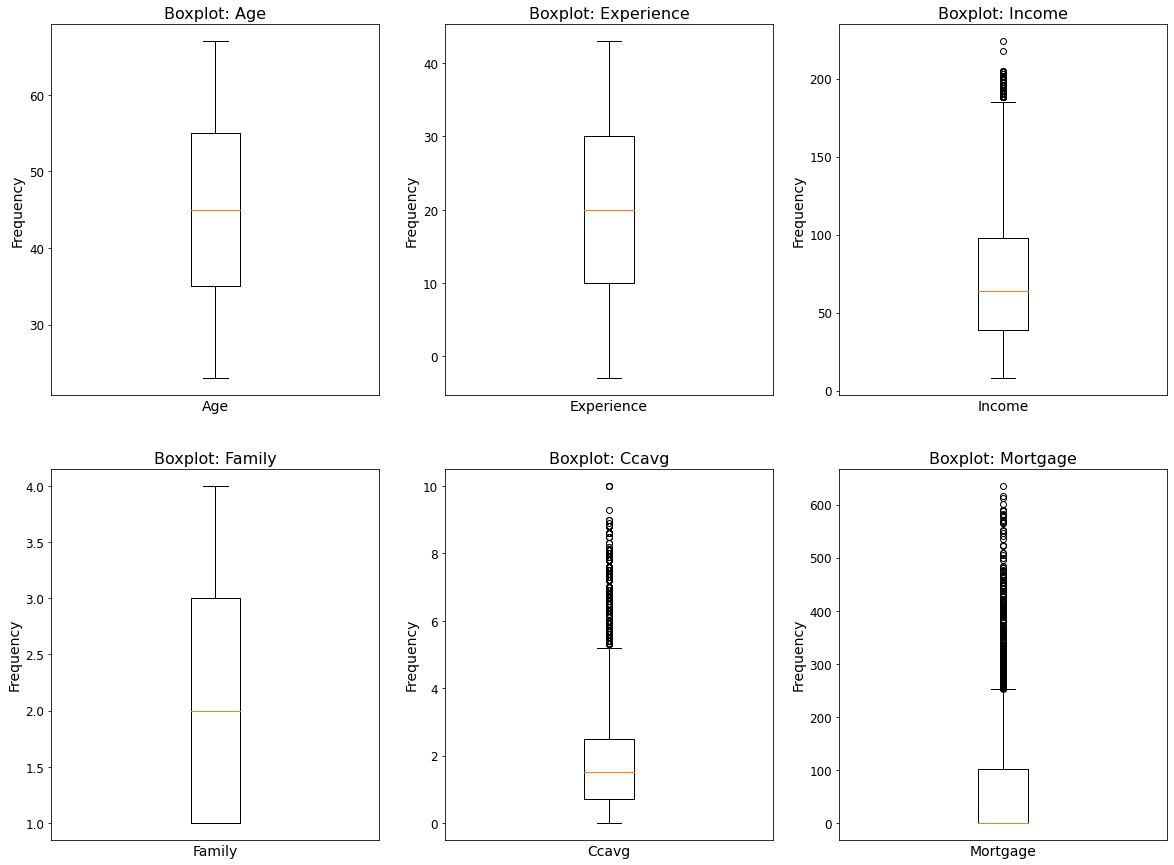

In [ ]:
# Continuous variable distributions
continuous_vars = ['age', 'experience', 'income', 'family', 'ccavg', 'mortgage']

# Plot Boxplot size setting
plt.figure(figsize = (20, 15))
i = 1

# Loop for plots
for vars in continuous_vars:
  plt.subplot(2, 3, i)
  plt.boxplot(x = bank_df[vars])
  plt.title('Boxplot: ' + vars.capitalize(), size = 16)
  plt.xlabel(vars.capitalize(), size = 14)
  plt.xticks(ticks = [])
  plt.yticks(size = 12)
  plt.ylabel('Frequency', size = 14)
  i += 1

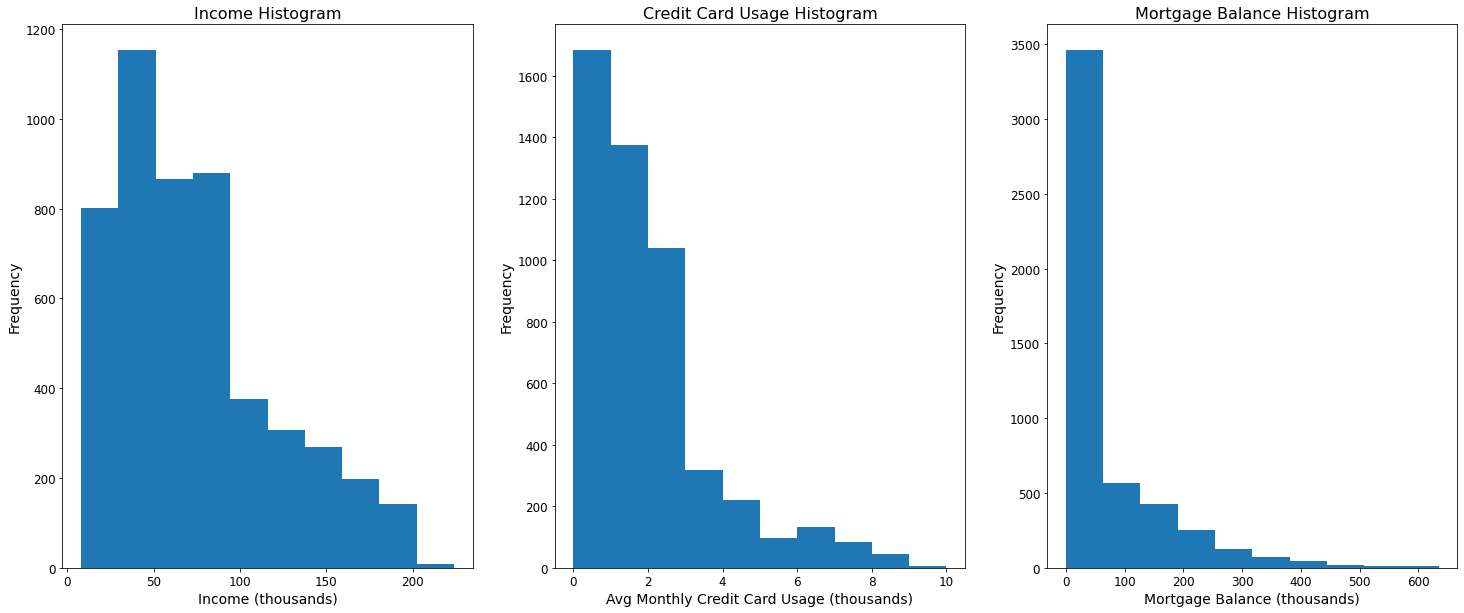

In [ ]:
# Distribution plots for columns with outliers visible
# Income
plt.figure(figsize = (25, 10))

plt.subplot(1, 3, 1)
plt.hist(bank_df.income)
plt.title('Income Histogram', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Income (thousands)', size = 14)
plt.ylabel('Frequency', size = 14)

# Credit Card Avg Monthly Usage
plt.subplot(1, 3, 2)
plt.hist(bank_df.ccavg)
plt.title('Credit Card Usage Histogram', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Avg Monthly Credit Card Usage (thousands)', size = 14)
plt.ylabel('Frequency', size = 14)

# Mortgage Balances
plt.subplot(1, 3, 3)
plt.hist(bank_df.mortgage)
plt.title('Mortgage Balance Histogram', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Mortgage Balance (thousands)', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

Total customers with income over 186500.0 =  96
Total customers with ccavg over 5200.0 =  324
Total customers with mortgage over 252500.0 =  291


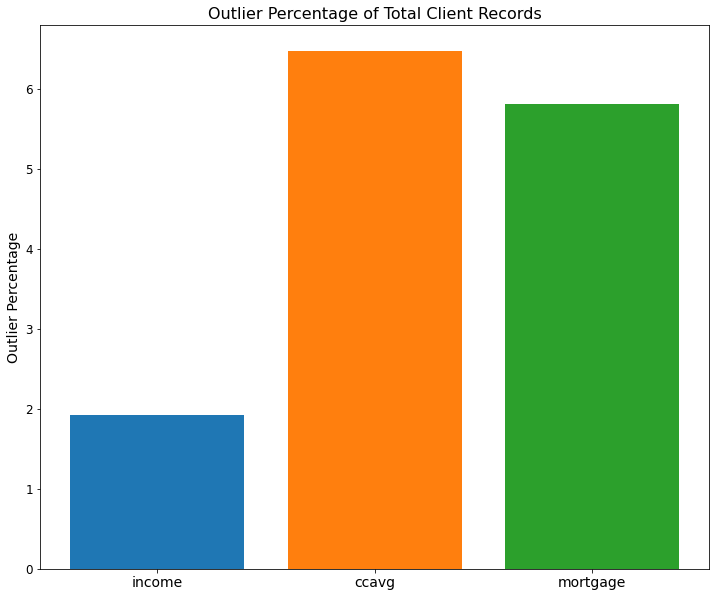

In [ ]:
# Analyze Outlier Count
outlier_cols = ['income', 'ccavg', 'mortgage']

# Total outliers in realtion to total clients in study
plt.figure(figsize = (12, 10))
i=0
for cols in outlier_cols:
  Q1 = bank_df[cols].quantile(0.25)
  Q3 = bank_df[cols].quantile(0.75)
  IQR = Q3 - Q1
  find_outliers = bank_df.loc[bank_df[cols] > (Q3 + IQR * 1.5)]
  total_pct = len(find_outliers[cols])/ 5000 * 100
  print('Total customers with {} over {} = '.format(cols, ((Q3 + IQR * 1.5) * 1000)), str(len(find_outliers[cols])))
  plt.title('Outlier Percentage of Total Client Records', size = 16)
  plt.bar(x = cols, height = total_pct)
  plt.ylabel('Outlier Percentage', size = 14)
  plt.xticks(size = 14)
  plt.yticks(size = 12)
  i += 1

Observations

Few outliers throughout the three columns displayed in the above boxplots.
* Income outliers - The amount of records decrease as salaries increase
* Credit Card Usage and Mortgage Balances - There are far more records of clients with low monthly credit card usage and mortgage balances

Will leave outliers in dataset

**Univariate Analysis:** Continuous Variables

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

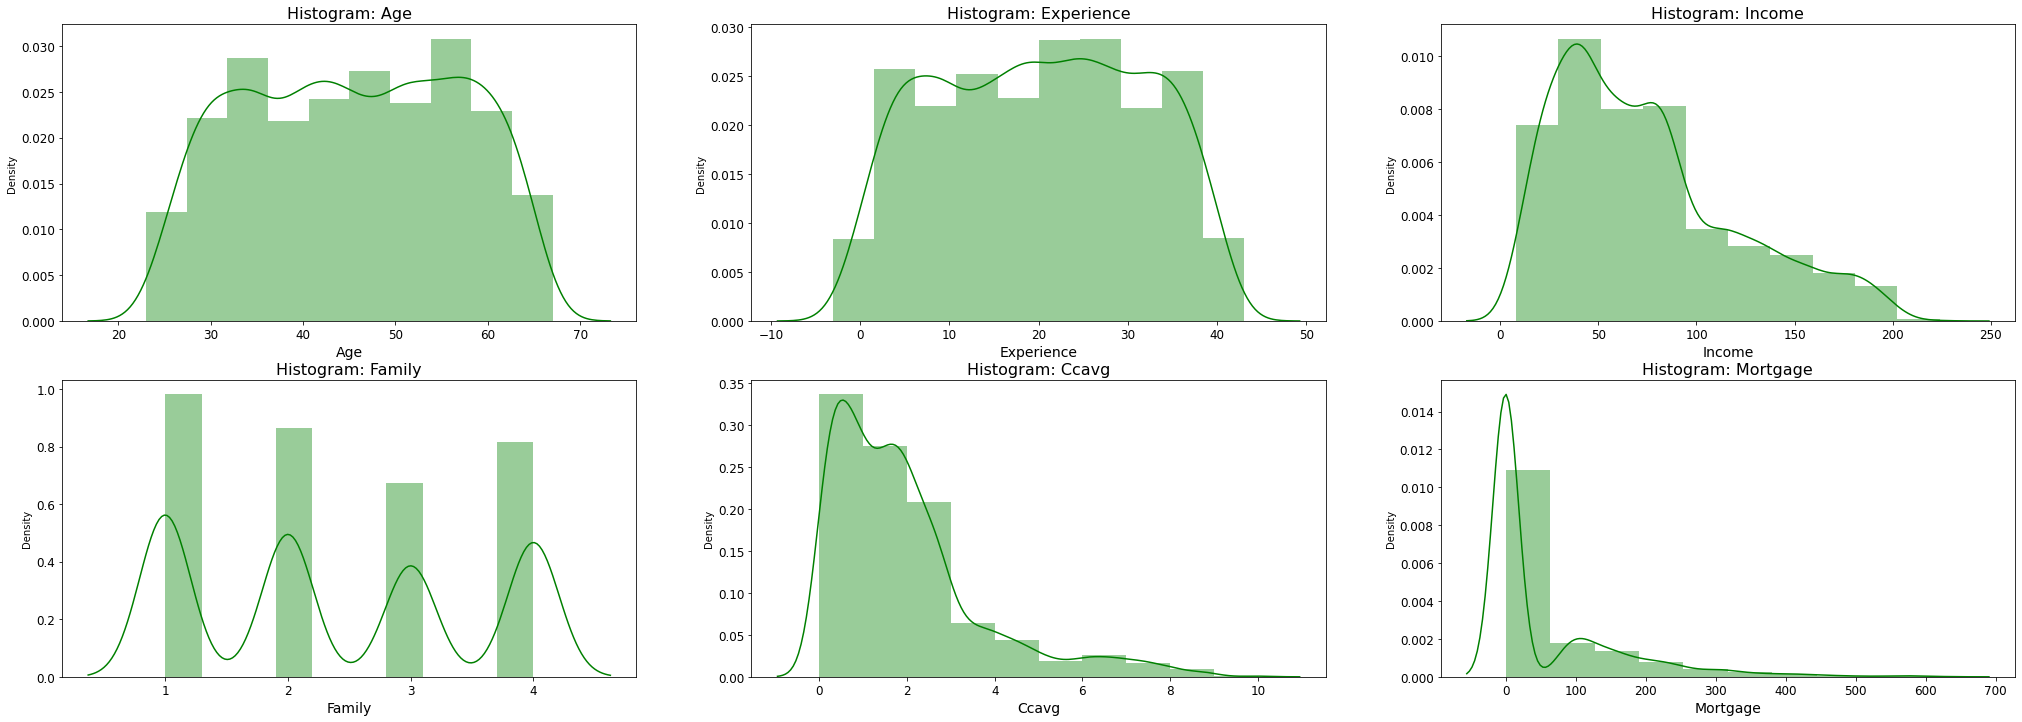


Descriptive Statistics:
Age:  DescribeResult(nobs=5000, minmax=(23, 67), mean=45.3384, variance=131.40416627325465, skewness=-0.029331878574766698, kurtosis=-1.1531142779719183)

Experience:  DescribeResult(nobs=5000, minmax=(-3, 43), mean=20.1046, variance=131.51396163232644, skewness=-0.026316790337654442, kurtosis=-1.1216013372135318)

Income:  DescribeResult(nobs=5000, minmax=(8, 224), mean=73.7742, variance=2119.1042352070417, skewness=0.8410861846424931, kurtosis=-0.045399717980349585)

Average Monthly Credit Card Usage:  DescribeResult(nobs=5000, minmax=(0.0, 10.0), mean=1.9379133333358, variance=3.0543370021089946, skewness=1.5979770410982959, kurtosis=2.642844914730076)

Mortgage Balance:  DescribeResult(nobs=5000, minmax=(0, 635), mean=56.4988, variance=10345.697538067612, skewness=2.103371065804789, kurtosis=4.75084144430716) 



In [ ]:
# Data distributions

# Distribution
# Plot histogram size setting
plt.figure(figsize = (35, 12))
i = 1

# Loop for plots
for vars in continuous_vars:
  plt.subplot(2, 3, i)
  sns.distplot(bank_df[vars], color = 'g', bins = 10)
  plt.title('Histogram: ' + vars.capitalize(), size = 16)
  plt.xlabel(vars.capitalize(), size = 14)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  i += 1
plt.show()

# Skewness and Kurtosis
print('\nDescriptive Statistics:\nAge: ', stats.describe(bank_df['age']))
print('\nExperience: ', stats.describe(bank_df['experience']))
print('\nIncome: ', stats.describe(bank_df['income']))
print('\nAverage Monthly Credit Card Usage: ', stats.describe(bank_df['ccavg']))
print('\nMortgage Balance: ', stats.describe(bank_df['mortgage']), '\n')

Attend to right skewed data

In [ ]:
# Address right skewed data
# Add 1 to all values of ccavg (to allow boxcox transformation of rows with previous values of zero)
bank_df['ccavg'] = bank_df['ccavg'] + 1

# Boxcox transformation on right skewed data
bank_df['boxcox_income'],laminc = stats.boxcox(bank_df.income)
bank_df['boxcox_ccavg'],lamcc = stats.boxcox(bank_df.ccavg)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



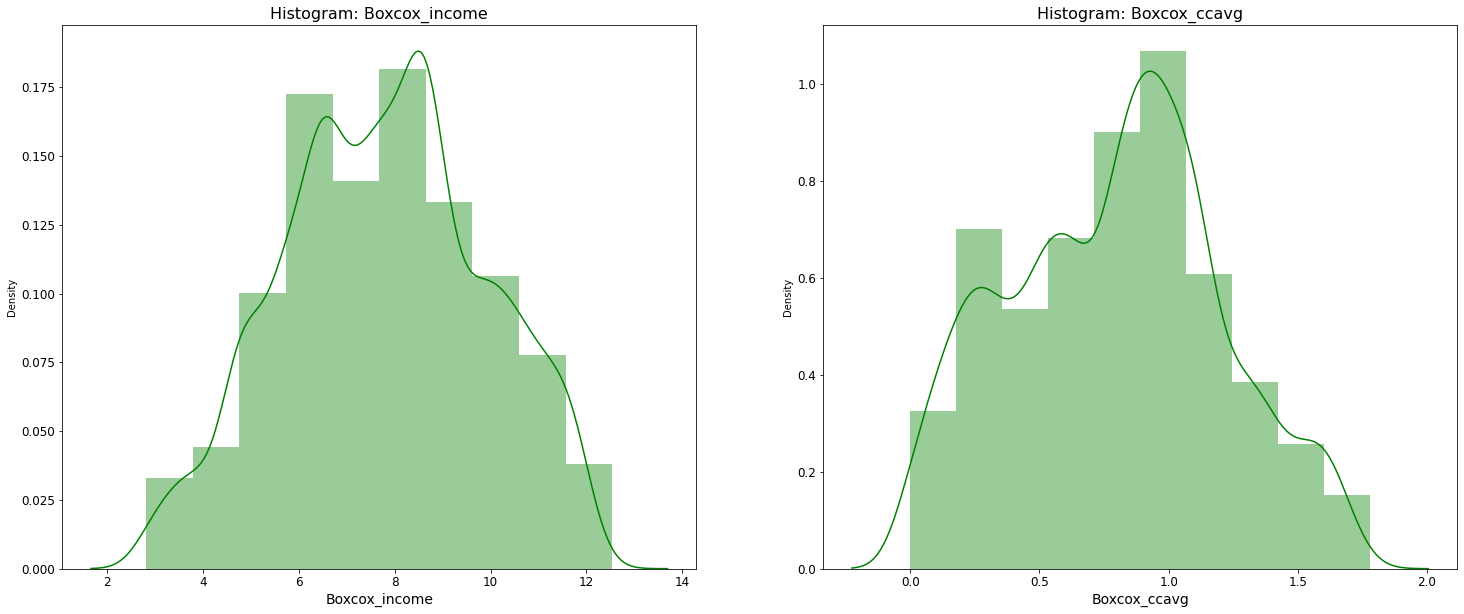


Descriptive Statistics:
boxcox_income:  DescribeResult(nobs=5000, minmax=(2.8109506125042905, 12.54000308403774), mean=7.781652196550481, variance=4.453371792722281, skewness=-0.040731994340926954, kurtosis=-0.6375910148390505)
boxcox_ccavg:  DescribeResult(nobs=5000, minmax=(0.0, 1.7797236921704798), mean=0.795803906742418, variance=0.17081391869982399, skewness=0.031998614333428085, kurtosis=-0.6992938375487912)


In [ ]:
# Distribution of transformed variables
transformed_vars = ['boxcox_income', 'boxcox_ccavg']

# Create plots of histograms
plt.figure(figsize = (25, 10))
i=1

for vars in transformed_vars:
  plt.subplot(1, 2, i)
  sns.distplot(bank_df[vars], bins = 10, color = 'g')
  plt.title('Histogram: ' + vars.capitalize(), size = 16)
  plt.xlabel(vars.capitalize(), size = 14)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  i += 1
plt.show()

# skewness and kurtosis
print('\nDescriptive Statistics:\nboxcox_income: ', stats.describe(bank_df['boxcox_income']))
print('boxcox_ccavg: ', stats.describe(bank_df['boxcox_ccavg']))

Normality Testing
* Continuous Variables

In [ ]:
# Jarques-Bera & normality tests

# Continuous variables of interest
continuous_vars2 = ['age',	'experience', 'family', 'mortgage', 'boxcox_income', 'boxcox_ccavg']

# Loop for tests
for vars in continuous_vars2:
  jb_test = stats.jarque_bera(bank_df[vars])
  norm_test = stats.normaltest(bank_df[vars])
  # Print results of tests
  print(vars)
  print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_test[0], jb_test[1]))
  print("Normality test statistics is {0} and p value is {1}".format(norm_test[0], norm_test[1]),'\n')

age
Jarque-Bera test statistics is 277.73207801366624 and p value is 0.0
Normality test statistics is 2908.9286774654342 and p value is 0.0 

experience
Jarque-Bera test statistics is 262.65830280289333 and p value is 0.0
Normality test statistics is 2328.8250405153435 and p value is 0.0 

family
Jarque-Bera test statistics is 430.3748246602477 and p value is 0.0
Normality test statistics is 47956.51170591574 and p value is 0.0 

mortgage
Jarque-Bera test statistics is 8388.994539751176 and p value is 0.0
Normality test statistics is 2100.083144837076 and p value is 0.0 

boxcox_income
Jarque-Bera test statistics is 86.07472576155132 and p value is 0.0
Normality test statistics is 195.06621018427523 and p value is 4.384404911613353e-43 

boxcox_ccavg
Jarque-Bera test statistics is 102.73073260640675 and p value is 0.0
Normality test statistics is 262.0443246738464 and p value is 1.252558129573937e-57 



P-Value < .05 for all variables. Null Hypothesis rejected; data is not normally distributed.

Experience Feature
* Tackle negative values found in education's descriptive statistics 

In [ ]:
# Inspect experience column - the column refers to YEARS of professional experience 
# Count of negative values
print(bank_df['experience'].loc[bank_df['experience']<0].count(), ' total negative values')

# View the dataframe values corresponding to the negative experience 
bank_df[bank_df['experience']<0]

52  total negative values


id  age  experience  income  zip_code  family     ccavg  education  \
89      90   25          -1     113     94303       4  3.300000          3   
226    227   24          -1      39     94085       2  2.700000          2   
315    316   24          -2      51     90630       3  1.300000          3   
451    452   28          -2      48     94132       2  2.750000          3   
524    525   24          -1      75     93014       4  1.200000          1   
536    537   25          -1      43     92173       3  3.400000          2   
540    541   25          -1     109     94010       4  3.300000          3   
576    577   25          -1      48     92870       3  1.300000          3   
583    584   24          -1      38     95045       2  2.700000          2   
597    598   24          -2     125     92835       2  8.200000          1   
649    650   25          -1      82     92677       4  3.100000          3   
670    671   23          -1      61     92374       4  3.600000          1   
686    687   24          -1      38     92612       4  1.600000          2   
793    794   24          -2     150     94720       2  3.000000          1   
889    890   24          -2      82     91103       2  2.600000          3   
909    910   23          -1     149     91709       1  7.333333          1   
1173  1174   24          -1      35     94305       2  2.700000          2   
1428  1429   25          -1      21     94583       4  1.400000          1   
1522  1523   25          -1     101     94720       4  3.300000          3   
1905  1906   25          -1     112     92507       2  3.000000          1   
2102  2103   25          -1      81     92647       2  2.600000          3   
2430  2431   23          -1      73     92120       4  3.600000          1   
2466  2467   24          -2      80     94105       2  2.600000          3   
2545  2546   25          -1      39     94720       3  3.400000          2   
2618  2619   23          -3      55     92704       3  3.400000          2   
2717  2718   23          -2      45     95422       4  1.600000          2   
2848  2849   24          -1      78     94720       2  2.800000          2   
2876  2877   24          -2      80     91107       2  2.600000          3   
2962  2963   23          -2      81     91711       2  2.800000          2   
2980  2981   25          -1      53     94305       3  3.400000          2   
3076  3077   29          -1      62     92672       2  2.750000          3   
3130  3131   23          -2      82     92152       2  2.800000          2   
3157  3158   23          -1      13     94720       4  2.000000          1   
3279  3280   26          -1      44     94901       1  3.000000          2   
3284  3285   25          -1     101     95819       4  3.100000          3   
3292  3293   25          -1      13     95616       4  1.400000          1   
3394  3395   25          -1     113     90089       4  3.100000          3   
3425  3426   23          -1      12     91605       4  2.000000          1   
3626  3627   24          -3      28     90089       4  2.000000          3   
3796  3797   24          -2      50     94920       3  3.400000          2   
3824  3825   23          -1      12     95064       4  2.000000          1   
3887  3888   24          -2     118     92634       2  8.200000          1   
3946  3947   25          -1      40     93117       3  3.400000          2   
4015  4016   25          -1     139     93106       2  3.000000          1   
4088  4089   29          -1      71     94801       2  2.750000          3   
4116  4117   24          -2     135     90065       2  8.200000          1   
4285  4286   23          -3     149     93555       2  8.200000          1   
4411  4412   23          -2      75     90291       2  2.800000          2   
4481  4482   25          -2      35     95045       4  2.000000          3   
4514  4515   24          -3      41     91768       4  2.000000          3   
4582  4583   25          -1   

In [ ]:
# View age details for the negative experience values
print('Age Descriptive Statistics - Negative Experience')
bank_df['age'].loc[bank_df['experience']<0].describe()

Age Descriptive Statistics - Negative Experience


count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: age, dtype: float64

In [ ]:
# Replace negative experience values with 
# the mean professional experience for a 25 yr old
bank_df.loc[bank_df['experience'] < 0 , 'experience'] = (bank_df[(bank_df['age'] == 25) & (bank_df['experience'] > 0)]['experience'].mean())

Negative experience values replaced with the mean experience corresponding to the mean age of 25 (1 year).

**Univariate Analyisis:** 
Categorical Variables

Two categorical columns:

Zip Codes
* 467 unique zip codes

Education has three levels:
1. Undergrad
2. Graduate
3. Advanced

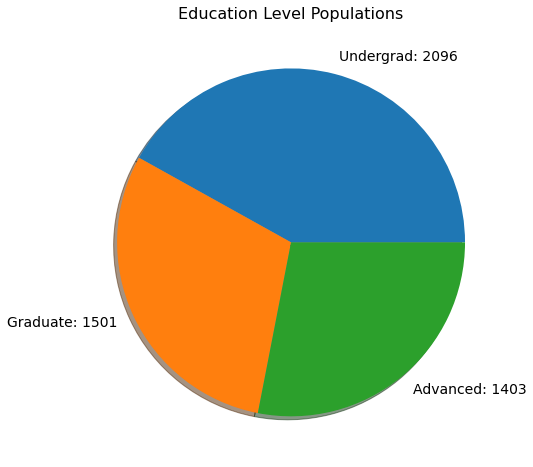

In [ ]:
# Education Count
plt.figure(figsize = (8, 8))
plt.pie(x = bank_df.education.value_counts(), labels = ['Undergrad: 2096', 'Graduate: 1501', 'Advanced: 1403'], shadow = True, textprops = {'fontsize': 14})
plt.title('Education Level Populations', size = 16)
plt.show()

In [ ]:
# Name education levels
bank_df.loc[bank_df['education'] == 1, 'education'] = 'Undergrad'
bank_df.loc[bank_df['education'] == 2, 'education'] = 'Graduate'
bank_df.loc[bank_df['education'] == 3, 'education'] = 'Advanced'

In [ ]:
# Binary Data
binary_vars = ['personal_loan', 'securities_account', 'cd_account', 'online', 'creditcard']

# Table with binary data
# Opportunities and products sold
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Bank Product</b>','<b>Opportunity</b>', '<b>Sold<b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'Credit Card'],
      [4520, 4478, 4698, 2016, 3530],
      [480, 522, 302, 2984, 1470]],
    line_color='darkslategray',
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

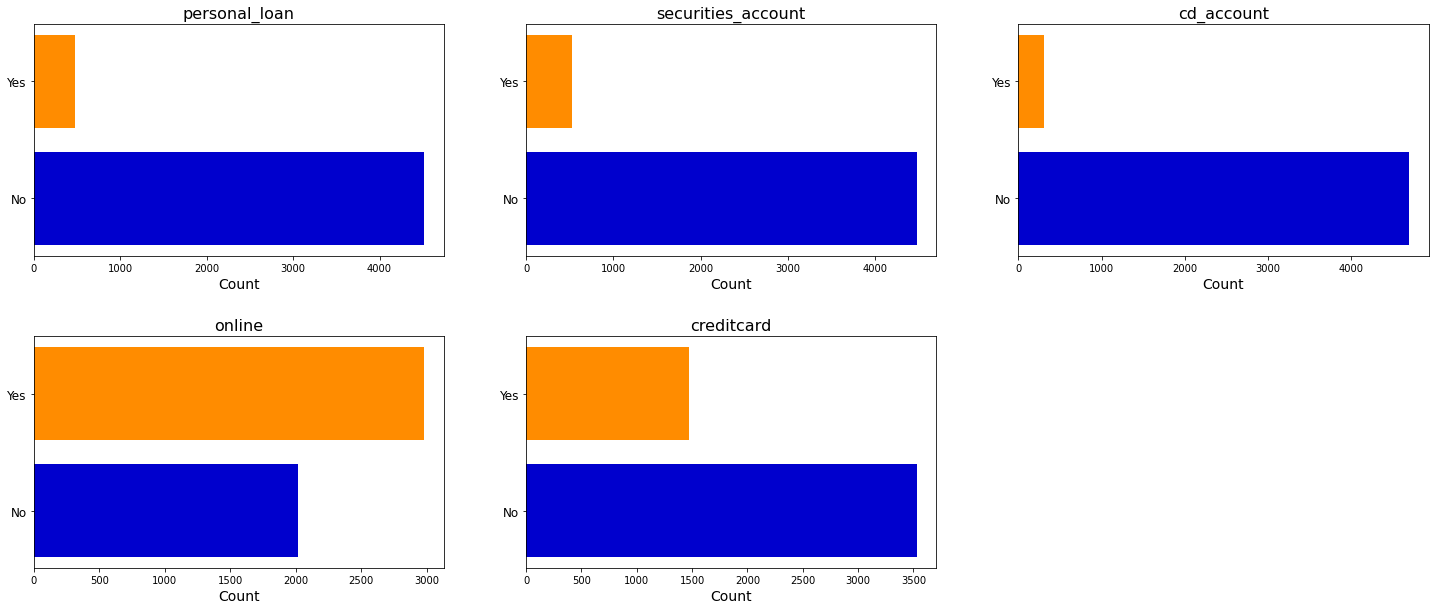

In [ ]:
# Variable count plots
plt.figure(figsize = (25, 10))
colors = ['mediumblue', 'darkorange']
yaxis = ['No', 'Yes']
i=1
for vars in binary_vars:
  plt.subplot(2, 3, i)
  plt.barh(yaxis, bank_df.groupby(vars)[vars].count(), color = colors)
  plt.title(vars, size = 16)
  plt.xlabel('Count', size = 14)
  plt.yticks(size = 12)
  i += 1
plt.subplots_adjust(wspace = .2, hspace = .35)
plt.show()

**Bivariate Analysis:** Continuous - Continuous

In [ ]:
# Correlation Table
corr_table = bank_df[['age',	'experience',	'boxcox_income',	'boxcox_ccavg',	'family',	'mortgage']].corr()
corr_table

age  experience  boxcox_income  boxcox_ccavg    family  \
age            1.000000    0.994098      -0.057554     -0.049687 -0.046418   
experience     0.994098    1.000000      -0.050521     -0.050981 -0.051922   
boxcox_income -0.057554   -0.050521       1.000000      0.588815 -0.135560   
boxcox_ccavg  -0.049687   -0.050981       0.588815      1.000000 -0.074323   
family        -0.046418   -0.051922      -0.135560     -0.074323  1.000000   
mortgage      -0.012539   -0.010972       0.193129      0.098493 -0.020445   

               mortgage  
age           -0.012539  
experience    -0.010972  
boxcox_income  0.193129  
boxcox_ccavg   0.098493  
family        -0.020445  
mortgage       1.000000

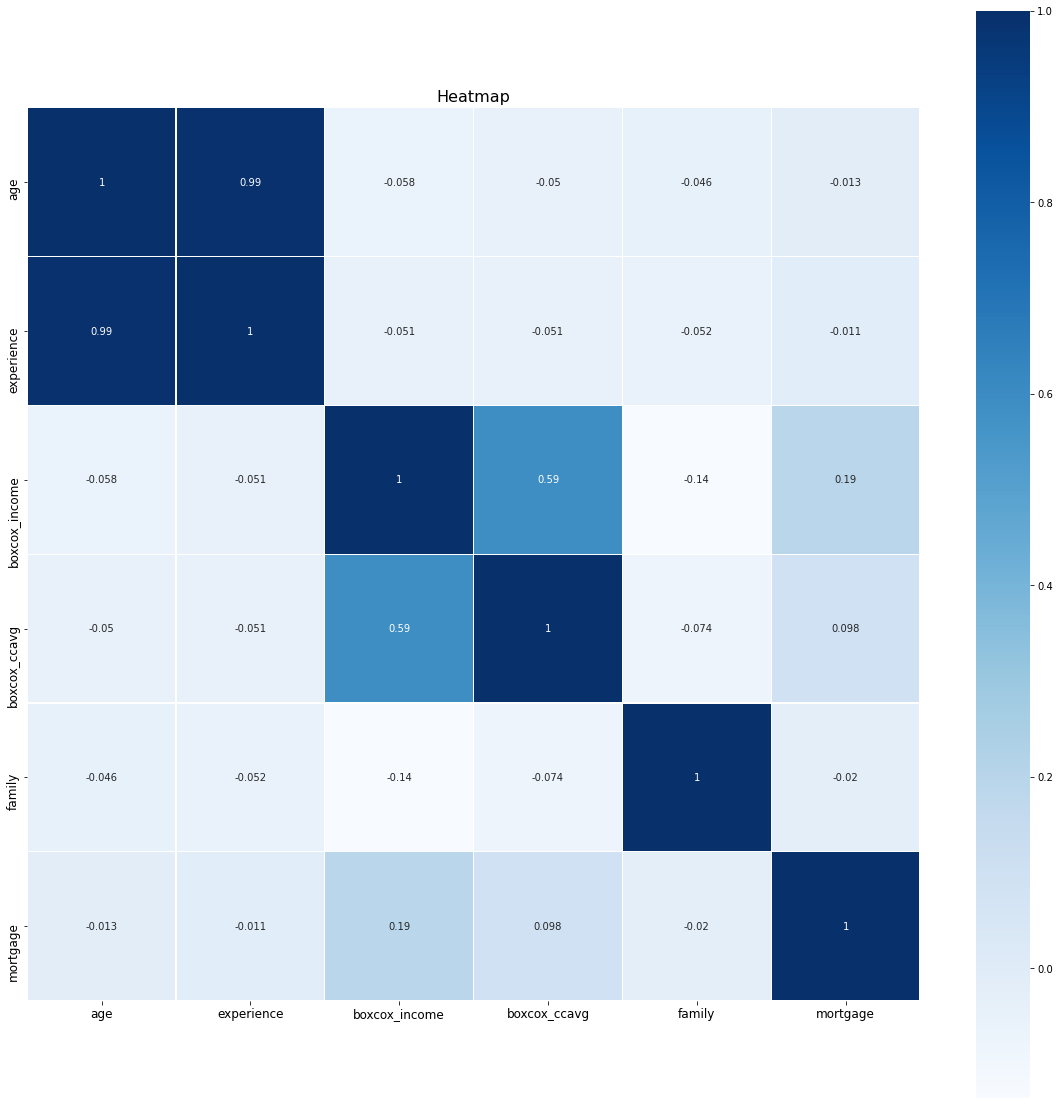

In [ ]:
# Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(corr_table, square = True, annot = True, linewidths = 0.2, cmap = 'Blues')
plt.title('Heatmap', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [ ]:
# List of top 10 correlated values (Absolute)
corr_table.abs().unstack().sort_values(ascending = False).drop_duplicates().head(10)

mortgage      mortgage         1.000000
age           experience       0.994098
boxcox_ccavg  boxcox_income    0.588815
mortgage      boxcox_income    0.193129
family        boxcox_income    0.135560
mortgage      boxcox_ccavg     0.098493
boxcox_ccavg  family           0.074323
age           boxcox_income    0.057554
family        experience       0.051922
boxcox_ccavg  experience       0.050981
dtype: float64

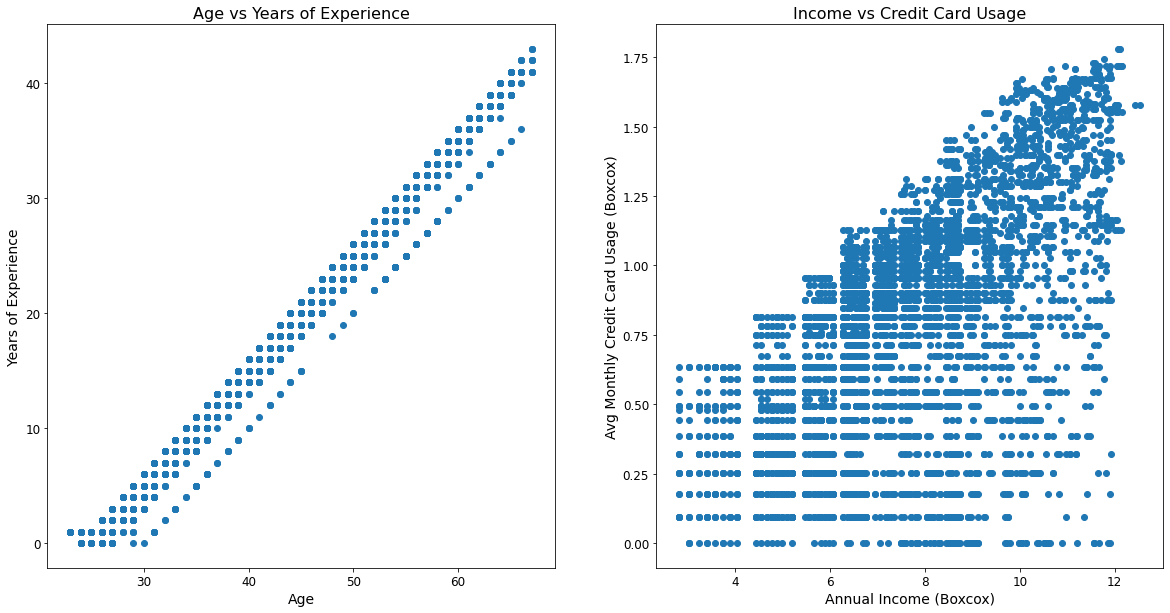

In [ ]:
# Scatterplot of top 2 correlated variables
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.scatter(x = bank_df.age, y = bank_df.experience)
plt.xlabel('Age', size = 14)
plt.ylabel('Years of Experience', size =14)
plt.title('Age vs Years of Experience', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(1, 2, 2)
plt.scatter(x = bank_df.boxcox_income, y = bank_df.boxcox_ccavg)
plt.xlabel('Annual Income (Boxcox)', size = 14)
plt.ylabel('Avg Monthly Credit Card Usage (Boxcox)', size = 14)
plt.title('Income vs Credit Card Usage', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.show()

**Bivariate Analysis:** Categorical - Continuous
* Education

In [ ]:
# List of categorical variables including binary columns
categs = ['id', 'zip_code', 'education', 'personal_loan', 'securities_account', 'cd_account', 'online', 'creditcard']

In [ ]:
# Education vs continuous means
bank_df.groupby('education')[continuous_vars].mean()

age  experience     income    family     ccavg   mortgage
education                                                                 
Advanced   46.140573   20.504997  66.122585  2.381079  2.723351  54.178548
Graduate   45.039914   19.798289  64.313614  2.652174  2.685020  51.319316
Undergrad  44.963740   20.083492  85.586355  2.236164  3.260846  61.627385

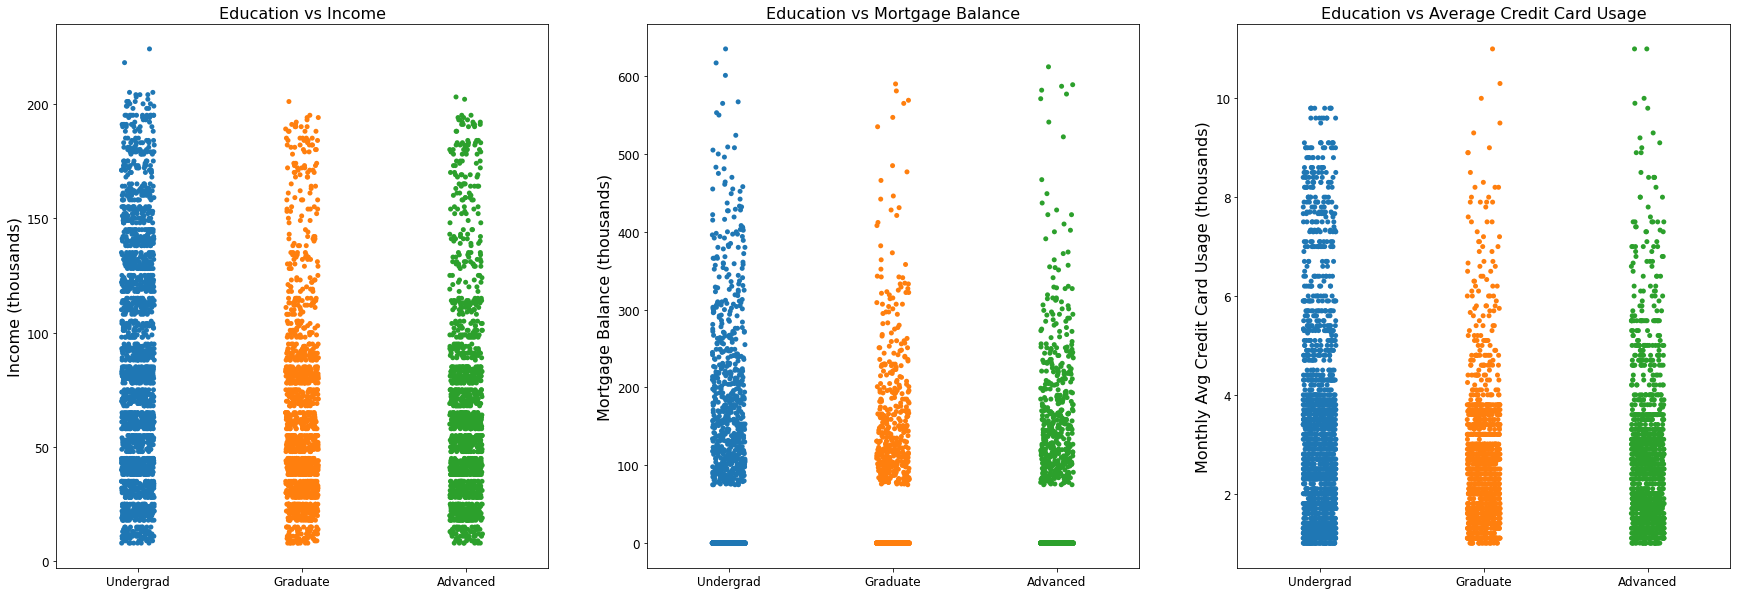

In [ ]:
plt.figure(figsize = (30, 10))
plt.subplot(1, 3, 1)
sns.stripplot(x = 'education', y = 'income', data = bank_df)
plt.title('Education vs Income', size = 16)
plt.xlabel("", size = 16)
plt.ylabel("Income (thousands)", size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(1, 3, 2)
sns.stripplot(x = 'education', y = 'mortgage', data = bank_df)
plt.title('Education vs Mortgage Balance', size = 16)
plt.xlabel("", size = 16)
plt.ylabel("Mortgage Balance (thousands)", size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(1, 3, 3)
sns.stripplot(x = 'education', y = 'ccavg', data = bank_df)
plt.title('Education vs Average Credit Card Usage', size = 16)
plt.xlabel("", size = 16)
plt.ylabel("Monthly Avg Credit Card Usage (thousands)", size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
# Display
plt.show()

Binary columns

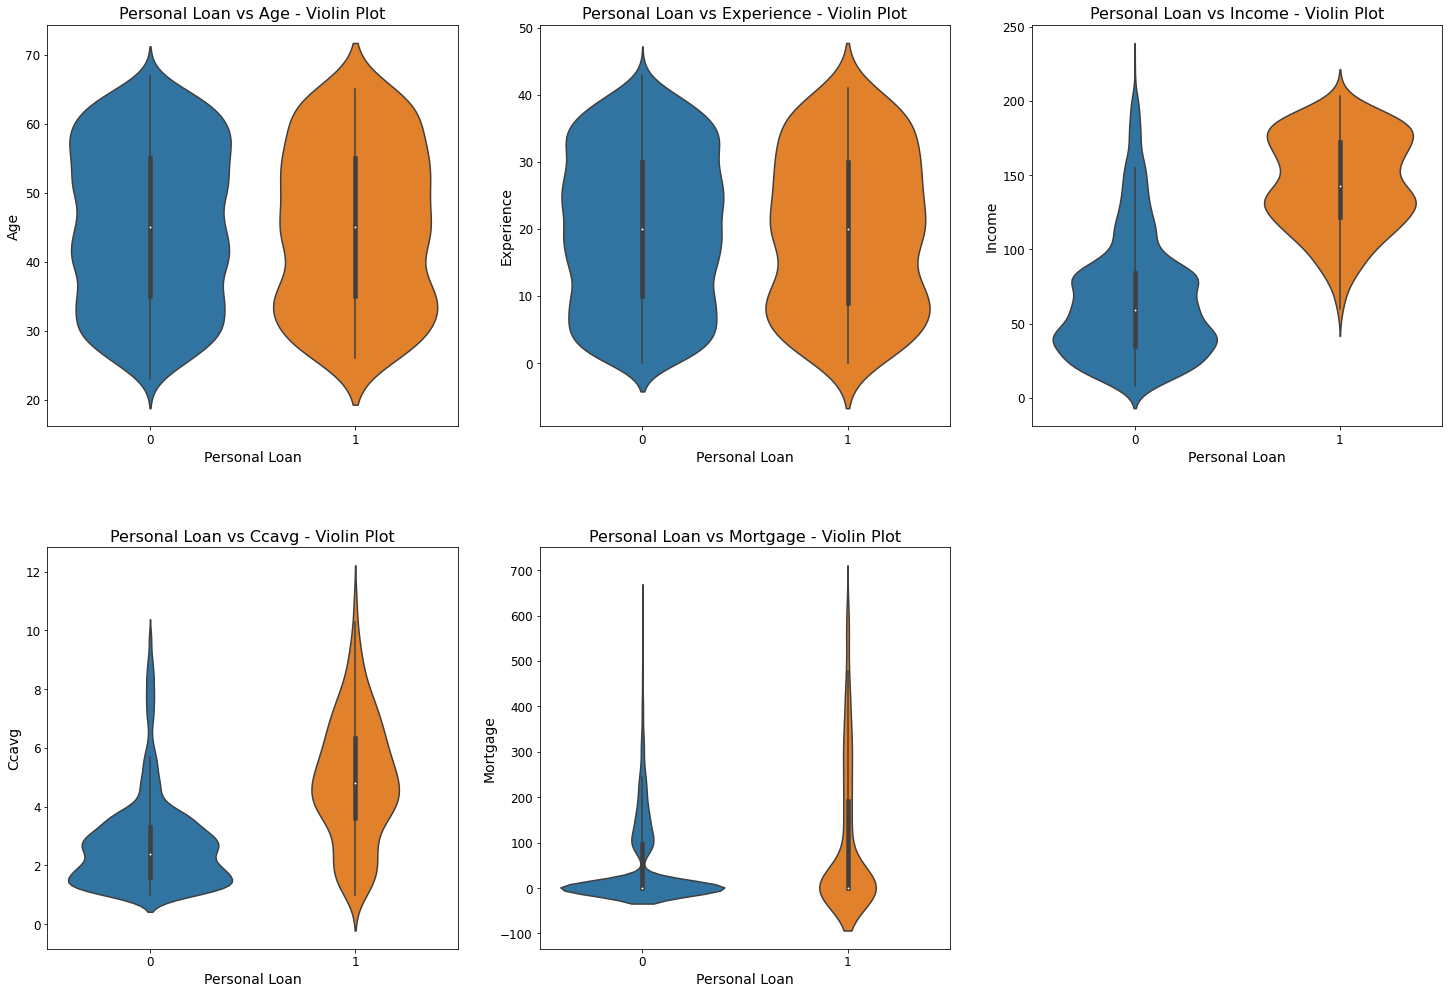

In [ ]:
# personal_loan vs continuous variables - mean
fig = plt.figure(figsize = (25, 17))
i = 1
for vars in ['age', 'experience', 'income', 'ccavg', 'mortgage']:
  ax = fig.add_subplot(2, 3, i)
  sns.violinplot(x = 'personal_loan', y = vars, data = bank_df, ax = ax)
  i += 1
  plt.title('Personal Loan vs ' + vars.capitalize() + ' - Violin Plot', size = 16)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.xlabel('Personal Loan', size = 14)
  plt.ylabel(vars.capitalize(), size = 14)
plt.subplots_adjust(hspace = 0.3)
plt.show()

Customers with personal loan have income and credit card usage that is on average higher than customers without personal loans.

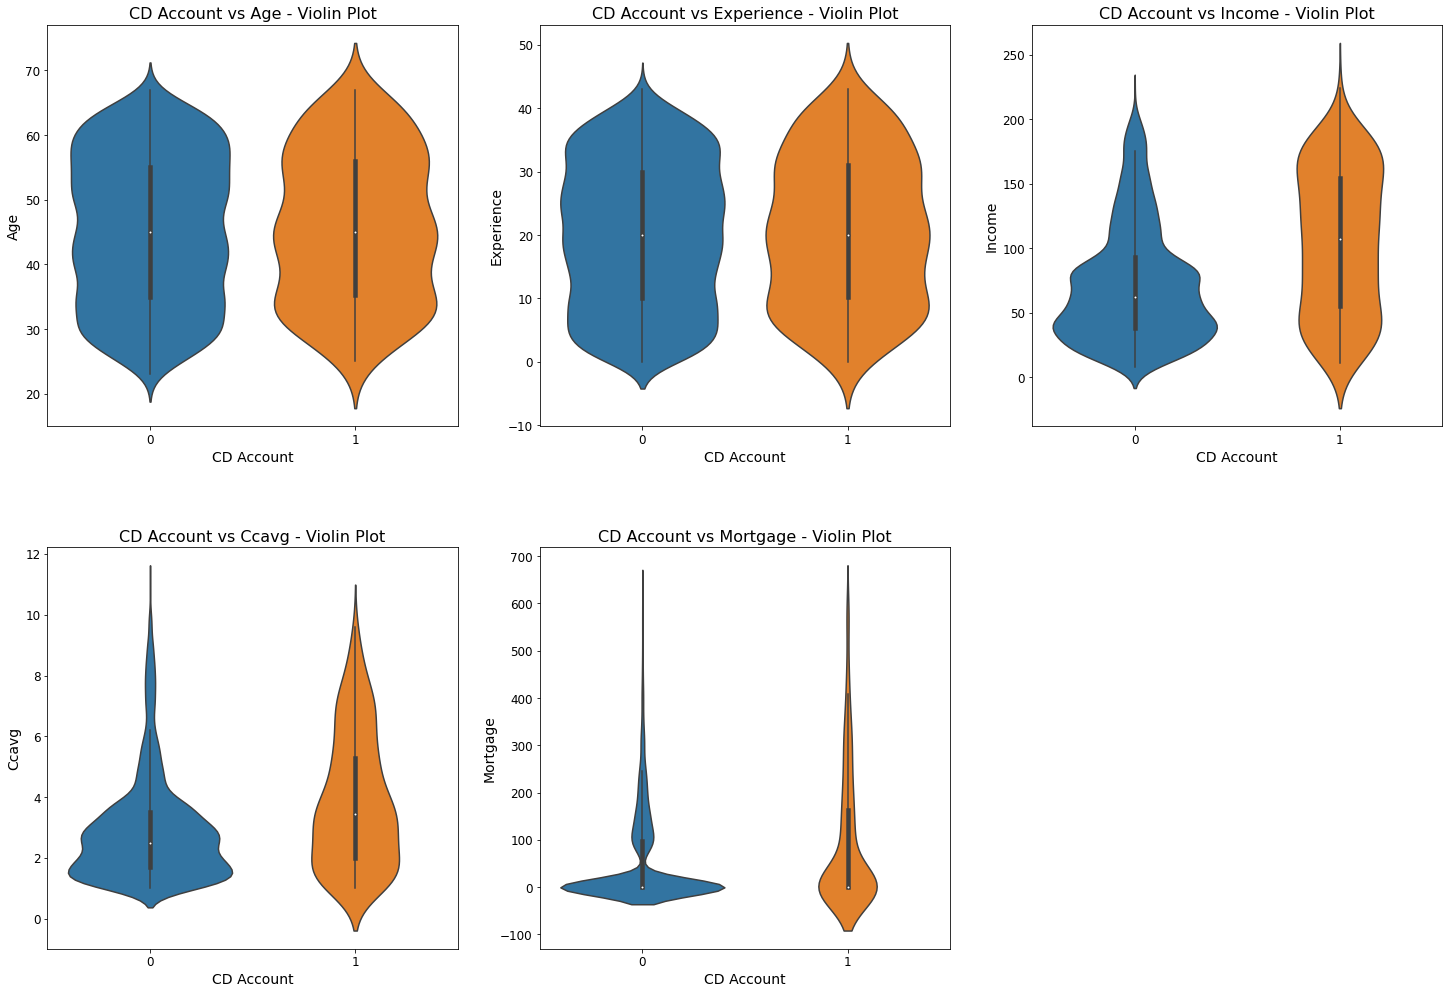

In [ ]:
# cd_acct vs continuous variables - mean
fig = plt.figure(figsize = (25, 17))
i = 1
for vars in ['age', 'experience', 'income', 'ccavg', 'mortgage']:
  ax = fig.add_subplot(2, 3, i)
  sns.violinplot(x = 'cd_account', y = vars, data = bank_df, ax = ax)
  i += 1
  plt.title('CD Account vs ' + vars.capitalize() + ' - Violin Plot', size = 16)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.xlabel('CD Account', size = 14)
  plt.ylabel(vars.capitalize(), size = 14)
plt.subplots_adjust(hspace = 0.3)
plt.show()

Customers with certificates of deposit also have incomes and credit card usage that are on average higher than customers without certificates of deposit.

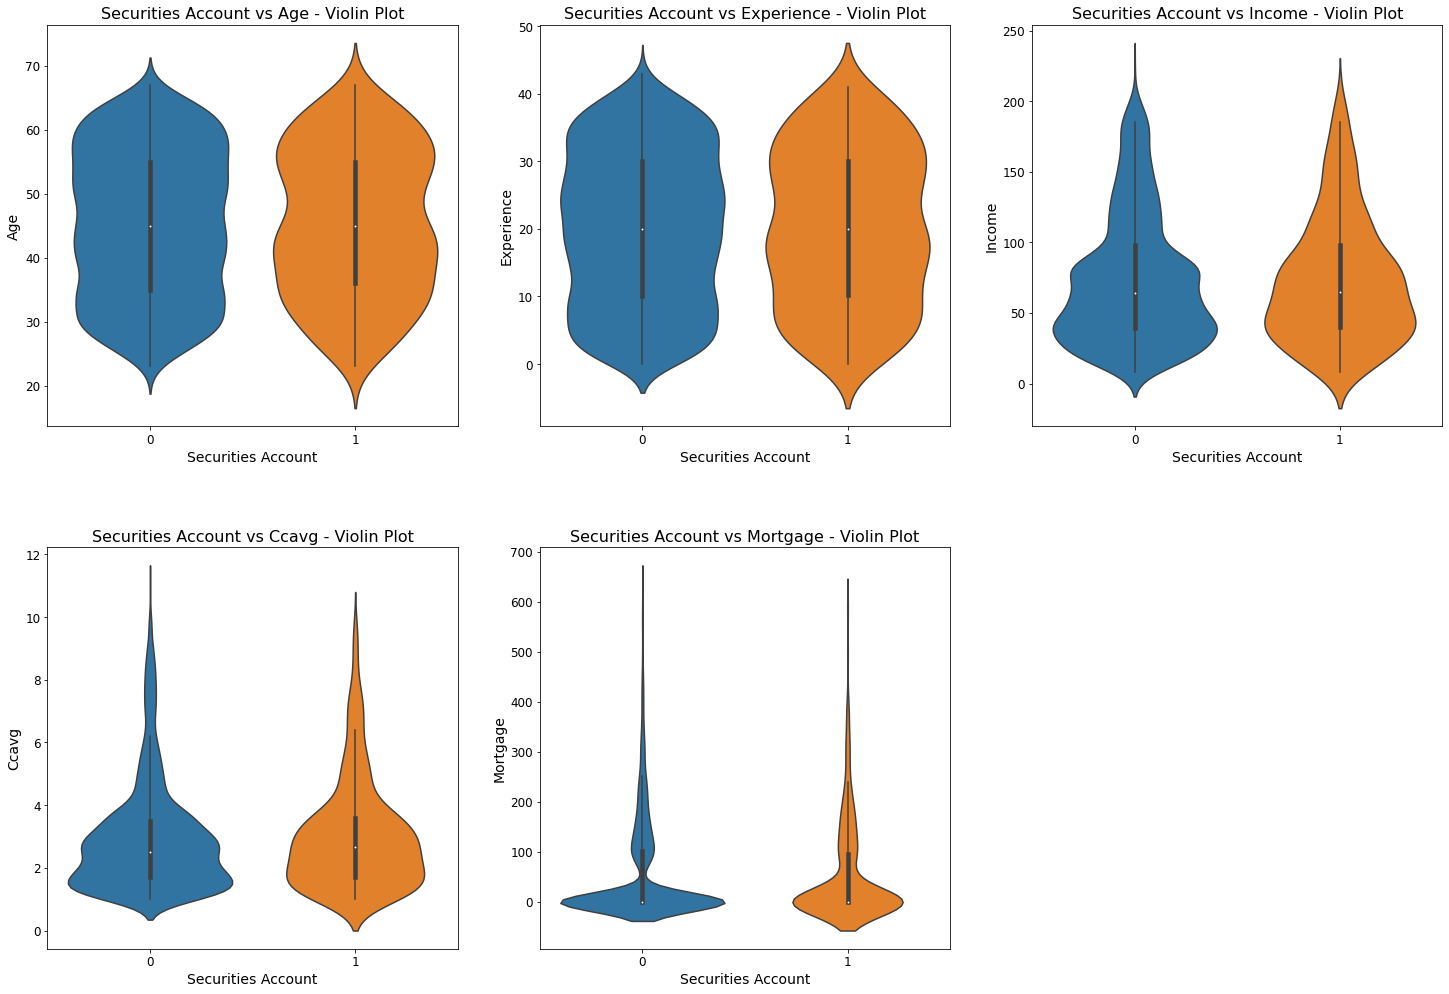

In [ ]:
# securities_account vs continuous variables - mean
fig = plt.figure(figsize = (25, 17))
i = 1
for vars in ['age', 'experience', 'income', 'ccavg', 'mortgage']:
  ax = fig.add_subplot(2, 3, i)
  sns.violinplot(x = 'securities_account', y = vars, data = bank_df, ax = ax)
  i += 1
  plt.title('Securities Account vs ' + vars.capitalize() + ' - Violin Plot', size = 16)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.xlabel('Securities Account', size = 14)
  plt.ylabel(vars.capitalize(), size = 14)
plt.subplots_adjust(hspace = 0.3)
plt.show()

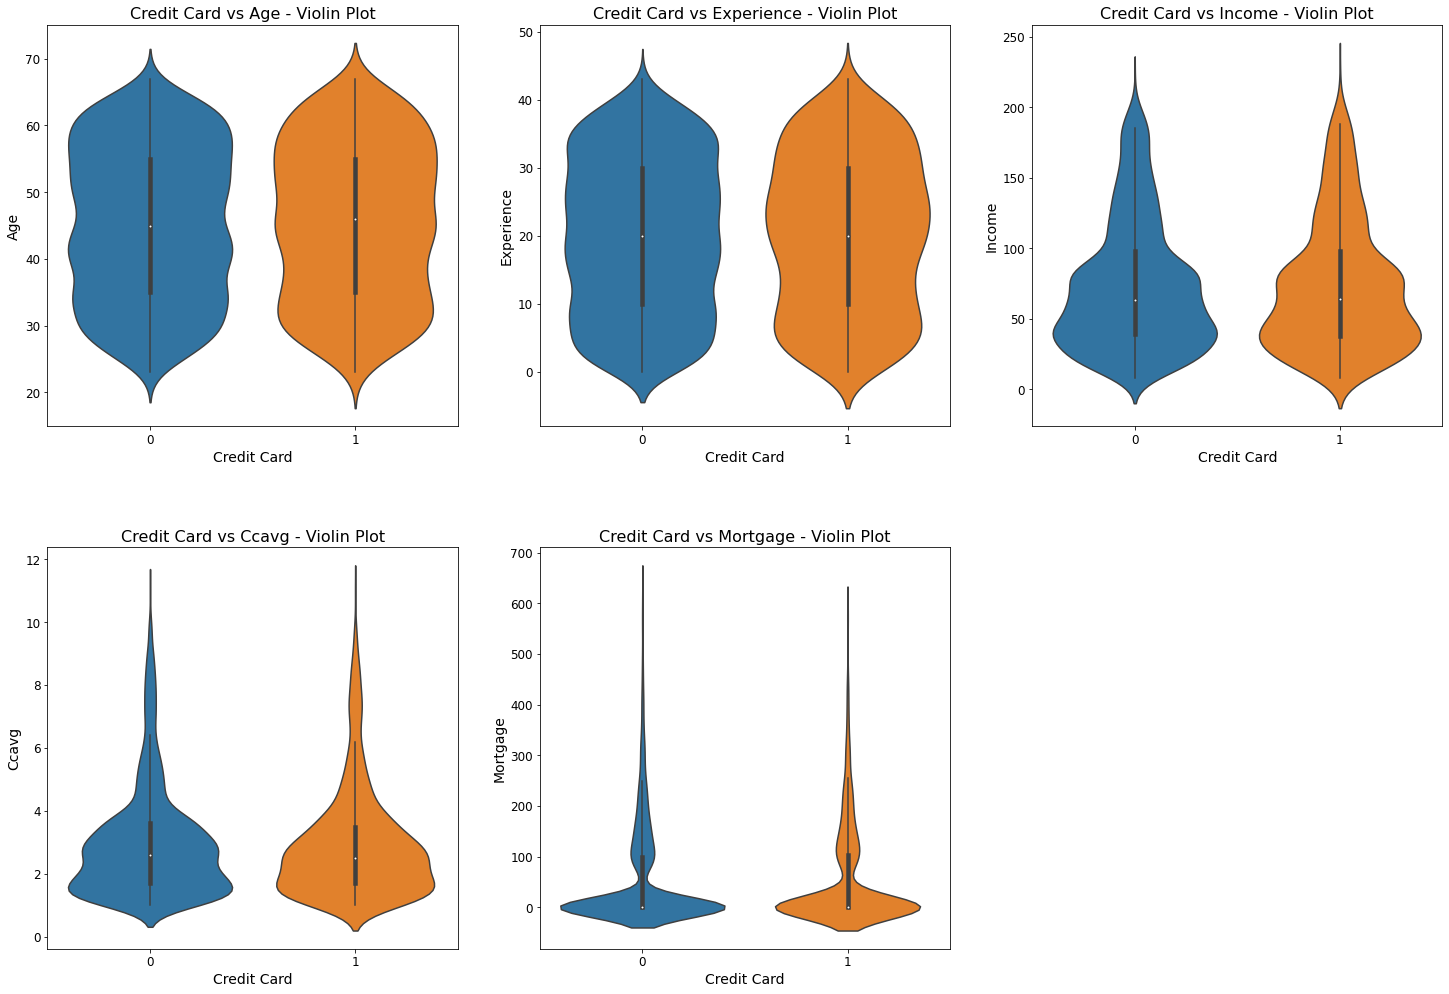

In [ ]:
# credit card vs continuous variables - mean
fig = plt.figure(figsize = (25, 17))
i = 1
for vars in ['age', 'experience', 'income', 'ccavg', 'mortgage']:
  ax = fig.add_subplot(2, 3, i)
  sns.violinplot(x = 'creditcard', y = vars, data = bank_df, ax = ax)
  i += 1
  plt.title('Credit Card vs ' + vars.capitalize() + ' - Violin Plot', size = 16)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.xlabel('Credit Card', size = 14)
  plt.ylabel(vars.capitalize(), size = 14)
plt.subplots_adjust(hspace = 0.3)
plt.show()

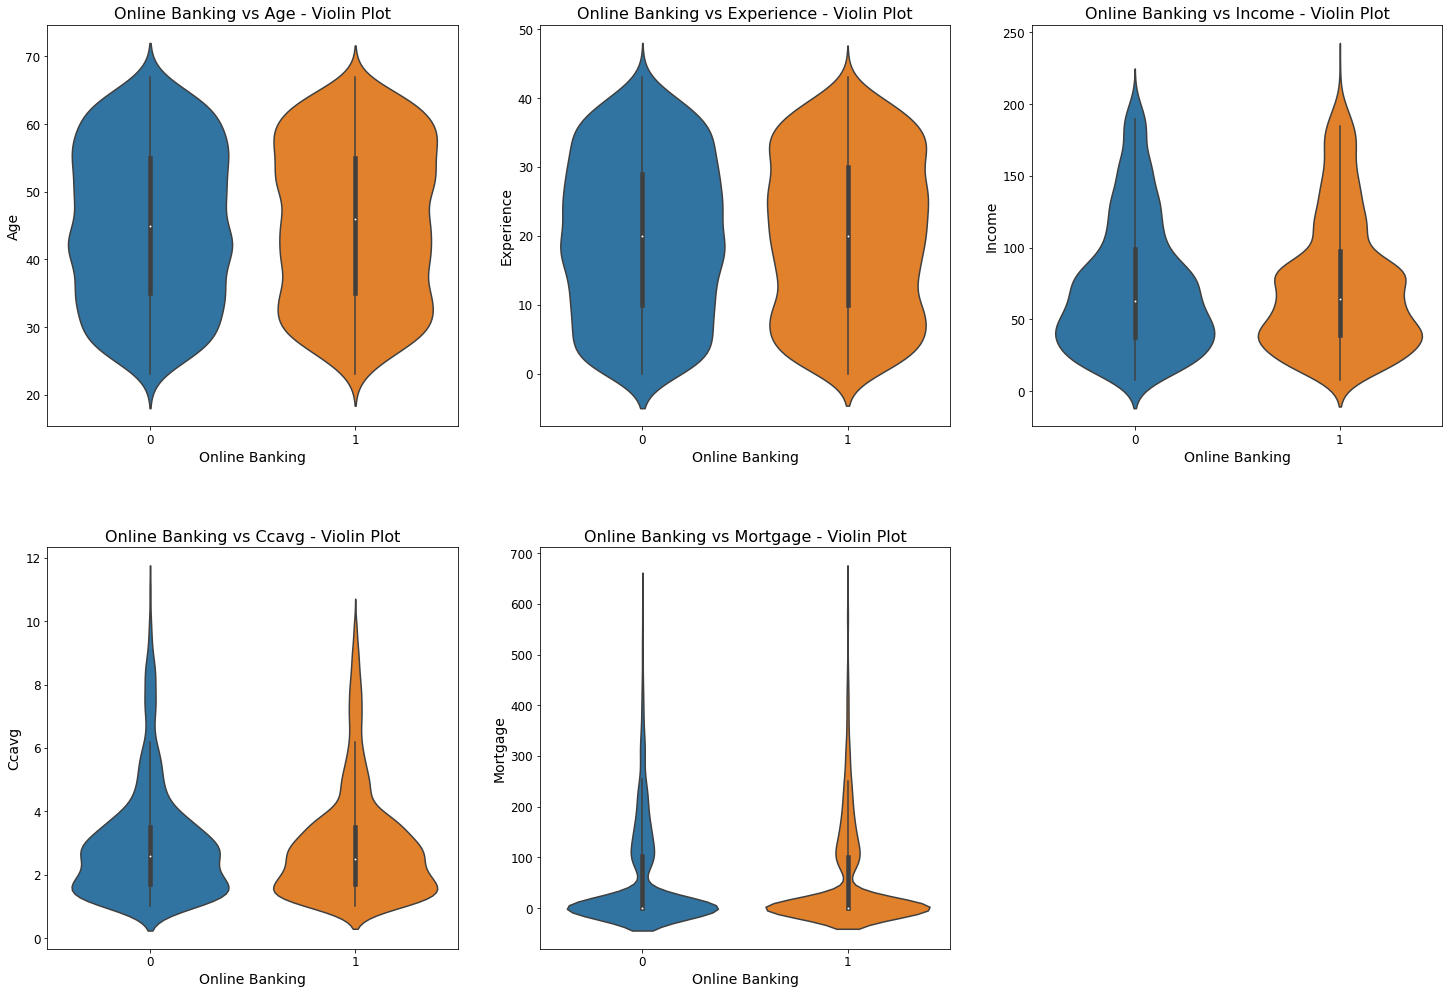

In [ ]:
# credit card vs continuous variables - mean
fig = plt.figure(figsize = (25, 17))
i = 1
for vars in ['age', 'experience', 'income', 'ccavg', 'mortgage']:
  ax = fig.add_subplot(2, 3, i)
  sns.violinplot(x = 'online', y = vars, data = bank_df, ax = ax)
  i += 1
  plt.title('Online Banking vs ' + vars.capitalize() + ' - Violin Plot', size = 16)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.xlabel('Online Banking', size = 14)
  plt.ylabel(vars.capitalize(), size = 14)
plt.subplots_adjust(hspace = 0.3)
plt.show()

Credit cards, online banking, and securities accounts show similar characteristics for those with and without the bank products.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



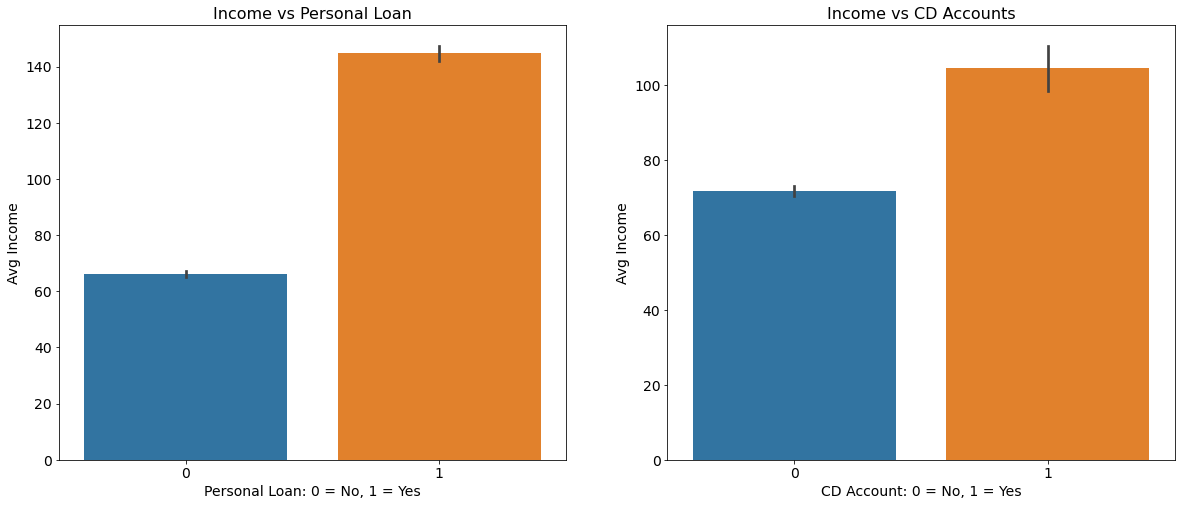

In [ ]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.barplot(bank_df.personal_loan, bank_df.income)
plt.title('Income vs Personal Loan', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel('Personal Loan: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Avg Income', size = 14)
plt.subplots_adjust(wspace = .2, hspace = .5)

plt.subplot(1, 2, 2)
sns.barplot(bank_df.cd_account, bank_df.income)
plt.title('Income vs CD Accounts', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel('CD Account: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Avg Income', size = 14)
plt.subplots_adjust(wspace = .2, hspace = .5)

plt.show()

Customers that hold personal loans or CD accounts with the bank, on average have higher incomes than their counterparts.

In [ ]:
# ANOVA testing
print('Personal Loan\n', stats.f_oneway((bank_df.loc[bank_df['personal_loan'] == 0])['income'], (bank_df.loc[bank_df['personal_loan'] == 1])['income']))
print('CD Account\n', stats.f_oneway((bank_df.loc[bank_df['cd_account'] == 0])['income'], (bank_df.loc[bank_df['cd_account'] == 1])['income']))

Personal Loan
 F_onewayResult(statistic=1688.0045804960757, pvalue=3.56029e-318)
CD Account
 F_onewayResult(statistic=148.26924506946867, pvalue=1.2357375258873452e-33)


Anova tests comfirm significant statistical differences exist in regard to income among customers with and without personal loans and certificate of deposit accounts.

**Feature Engineering**

In [ ]:
# Zipcode Reduction

# Load dataframe with zipcodes and corresponding cities
cities_df = pd.read_csv('https://raw.githubusercontent.com/fdortega/pythonobjects/master/ziplists.csv')

# Make zip code column the same as bank_df, and CIty lowercase
cities_df.columns = ['zip_code' if x=='Zip Code' else x for x in cities_df.columns]
cities_df.columns = ['city' if x=='City' else x for x in cities_df.columns]
cities_df.columns = ['county' if x=='County' else x for x in cities_df.columns]

In [ ]:
# Preview zipcode dataframe
cities_df.head()

zip_code         city       county
0     90001  Los Angeles  Los Angeles
1     90002  Los Angeles  Los Angeles
2     90003  Los Angeles  Los Angeles
3     90004  Los Angeles  Los Angeles
4     90005  Los Angeles  Los Angeles

In [ ]:
# Create a new datframe with city variable added and mapped with zipcodes
bank_df2 = pd.merge(bank_df, cities_df, on = 'zip_code', how = 'left')

# Verify new dataframe and ensure no missing values
bank_df2.head()

id  age  experience  income  zip_code  family  ccavg  education  mortgage  \
0   1   25         1.0      49     91107       4    2.6  Undergrad         0   
1   2   45        19.0      34     90089       3    2.5  Undergrad         0   
2   3   39        15.0      11     94720       1    2.0  Undergrad         0   
3   4   35         9.0     100     94112       1    3.7   Graduate         0   
4   5   35         8.0      45     91330       4    2.0   Graduate         0   

   personal_loan  securities_account  cd_account  online  creditcard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   boxcox_income  boxcox_ccavg           city         county  
0       6.994487      0.845150       Pasadena    Los Angeles  
1       5.974230      0.814468    Los Angeles    Los Angeles  
2       3.402765      0.633771       Berkeley        Alameda  
3       9.309254      1.107409  San Francisco  San Francisco  
4       6.747451      0.633771     Northridge    Los Angeles

In [ ]:
# Determine if any missing values resulting from merge
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   float64
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   object 
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
 14  boxcox_income       5000 non-null   float64
 15  boxcox_ccavg        5000 non-null   float64
 16  city  

In [ ]:
# Identify the zipcodes pertaining to the missing city and county data
bank_df2.loc[bank_df2.city.isnull()]['zip_code'].unique()

array([92717,  9307, 92634, 96651])

In [ ]:
# Correct missing cities and counties
bank_df2.loc[bank_df2['zip_code'] == 92717, 'county'] = 'Orange'
bank_df2.loc[bank_df2['zip_code'] == 92717, 'city'] = 'Irvine'

bank_df2.loc[bank_df2['zip_code'] == 92634, 'county'] = 'Orange'
bank_df2.loc[bank_df2['zip_code'] == 92634, 'city'] = 'Fullerton'

bank_df2.loc[bank_df2['zip_code'] == 96651, 'county'] = 'San Francisco'
bank_df2.loc[bank_df2['zip_code'] == 96651, 'city'] = 'San Francisco'

bank_df2.loc[bank_df2['zip_code'] == 9307, 'zip_code'] = 90307
bank_df2.loc[bank_df2['zip_code'] == 90307, 'county'] = 'Los Angeles'
bank_df2.loc[bank_df2['zip_code'] == 90307, 'city'] = 'Inglewood'

In [ ]:
# Verify zip code unique values are still 467
print('New DataFrame contains {} unique zipcodes'.format(len(bank_df2.zip_code.value_counts())))

# City and county value count
print('\ncities: ', len(bank_df2.city.value_counts()))
print('counties: ', len(bank_df2.county.value_counts()))

New DataFrame contains 467 unique zipcodes

cities:  244
counties:  38


Will use the county level in place of zip code

New feature to summarize total bank products per customer

In [ ]:
# Create binary feature to identify mortgage customers
bank_df2.loc[bank_df2['mortgage'] > 0, 'mortgage_acct'] = 1
bank_df2.loc[bank_df2['mortgage'] == 0, 'mortgage_acct'] = 0

# Add feature to total all non-checking products
bank_df2['total_products'] = bank_df2.personal_loan + bank_df2.securities_account + bank_df2.cd_account + bank_df2.online + bank_df2.creditcard + bank_df2.mortgage_acct

bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   float64
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   object 
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
 14  boxcox_income       5000 non-null   float64
 15  boxcox_ccavg        5000 non-null   float64
 16  city  

In [ ]:
# Create a copy of non-scaled dataframe for clustering group analysis
bank_df3 = bank_df2.drop(columns = ['zip_code', 'boxcox_income', 'boxcox_ccavg', 'city'])
bank_df3.head()

id  age  experience  income  family  ccavg  education  mortgage  \
0   1   25         1.0      49       4    2.6  Undergrad         0   
1   2   45        19.0      34       3    2.5  Undergrad         0   
2   3   39        15.0      11       1    2.0  Undergrad         0   
3   4   35         9.0     100       1    3.7   Graduate         0   
4   5   35         8.0      45       4    2.0   Graduate         0   

   personal_loan  securities_account  cd_account  online  creditcard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

          county  mortgage_acct  total_products  
0    Los Angeles            0.0             1.0  
1    Los Angeles            0.0             1.0  
2        Alameda            0.0             0.0  
3  San Francisco            0.0             0.0  
4    Los Angeles            0.0             1.0

One-hot encoding

In [ ]:
bank_df2.head()

id  age  experience  income  zip_code  family  ccavg  education  mortgage  \
0   1   25         1.0      49     91107       4    2.6  Undergrad         0   
1   2   45        19.0      34     90089       3    2.5  Undergrad         0   
2   3   39        15.0      11     94720       1    2.0  Undergrad         0   
3   4   35         9.0     100     94112       1    3.7   Graduate         0   
4   5   35         8.0      45     91330       4    2.0   Graduate         0   

   personal_loan  securities_account  cd_account  online  creditcard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   boxcox_income  boxcox_ccavg           city         county  mortgage_acct  \
0       6.994487      0.845150       Pasadena    Los Angeles            0.0   
1       5.974230      0.814468    Los Angeles    Los Angeles            0.0   
2       3.402765      0.633771       Berkeley        Alameda            0.0   
3       9.309254      1.107409  San Francisco  San Francisco            0.0   
4       6.747451      0.633771     Northridge    Los Angeles            0.0   

   total_products  
0             1.0  
1             1.0  
2             0.0  
3             0.0  
4             1.0

In [ ]:
# Dummy Values for Education and County
bank_df2 = pd.concat([bank_df2, pd.get_dummies(bank_df2["county"])], axis=1)
bank_df2 = pd.concat([bank_df2, pd.get_dummies(bank_df2["education"], prefix = 'education_')], axis=1)

# Drop county as well as other features not used in modelling
bank_df2.drop(columns = ['city', 'zip_code', 'id', 'income', 'ccavg', 'county', 'education'], inplace = True)

In [ ]:
# View dataframe
bank_df2.head()

age  experience  family  mortgage  personal_loan  securities_account  \
0   25         1.0       4         0              0                   1   
1   45        19.0       3         0              0                   1   
2   39        15.0       1         0              0                   0   
3   35         9.0       1         0              0                   0   
4   35         8.0       4         0              0                   0   

   cd_account  online  creditcard  boxcox_income  boxcox_ccavg  mortgage_acct  \
0           0       0           0       6.994487      0.845150            0.0   
1           0       0           0       5.974230      0.814468            0.0   
2           0       0           0       3.402765      0.633771            0.0   
3           0       0           0       9.309254      1.107409            0.0   
4           0       0           1       6.747451      0.633771            0.0   

   total_products  Alameda  Butte  Contra Costa  El Dorado  Fresno  Humboldt  \
0             1.0        0      0             0          0       0         0   
1             1.0        0      0             0          0       0         0   
2             0.0        1      0             0          0       0         0   
3             0.0        0      0             0          0       0         0   
4             1.0        0      0             0          0       0         0   

   Imperial  Kern  Lake  Los Angeles  Marin  Mendocino  Merced  Monterey  \
0         0     0     0            1      0          0       0         0   
1         0     0     0            1      0          0       0         0   
2         0     0     0            0      0          0       0         0   
3         0     0     0            0      0          0       0         0   
4         0     0     0            1      0          0       0         0   

   Napa  Orange  Placer  Riverside  Sacramento  San Benito  San Bernardino  \
0     0       0       0          0           0           0               0   
1     0       0       0          0           0           0               0   
2     0       0       0          0           0           0               0   
3     0       0       0          0           0           0               0   
4     0       0       0          0           0           0               0   

   San Diego  San Francisco  San Joaquin  San Luis Obispo  San Mateo  \
0          0              0            0                0          0   
1          0              0            0                0          0   
2          0              0            0                0          0   
3          0              1            0                0          0   
4          0              0            0                0          0   

   Santa Barbara  Santa Clara  Santa Cruz  Shasta  Siskiyou  Solano  Sonoma  \
0              0            0           0       0         0       0       0   
1              0            0           0       0         0       0       0   
2              0            0           0       0         0       0       0   
3              0            0           0       0         0       0       0   
4              0            0           0       0         0       0       0   

   Stanislaus  Trinity  Tuolumne  Ventura  Yolo  education__Advanced  \
0           0        0         0        0     0                    0   
1           0        0         0        0     0                    0   
2           0        0         0        0     0                    0   
3           0        0         0        0     0                    0   
4           0        0         0        0     0                    0   

   education__Graduate  education__Undergrad  
0                    0                     1  
1                    0                     1  
2                    0                     1  
3                    1                     0  
4                    1                     0

In [ ]:
# Update binary variables
binary_vars = ['personal_loan', 'securities_account', 'cd_account', 'online', 'creditcard', 'mortgage_acct']

Continue Data Exploration: 

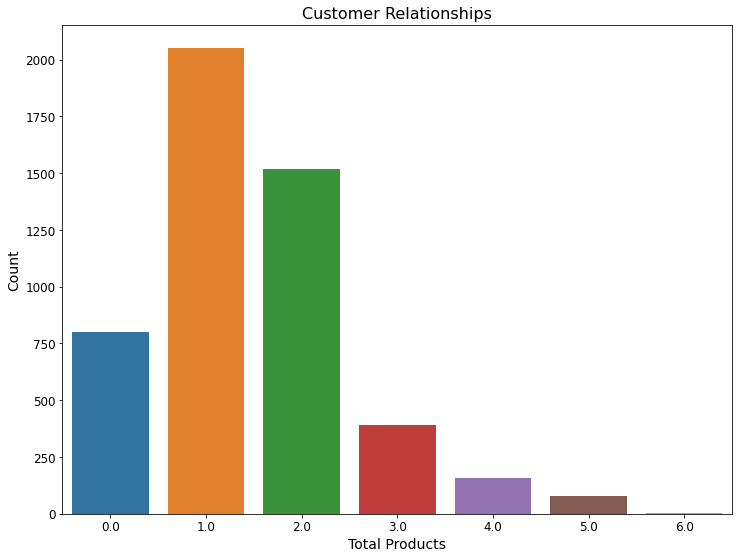

In [ ]:
# What is the most common total customer realtionship?
plt.figure(figsize = (12, 9))
sns.countplot(x = 'total_products', data = bank_df3)
plt.title('Customer Relationships', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Total Products', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

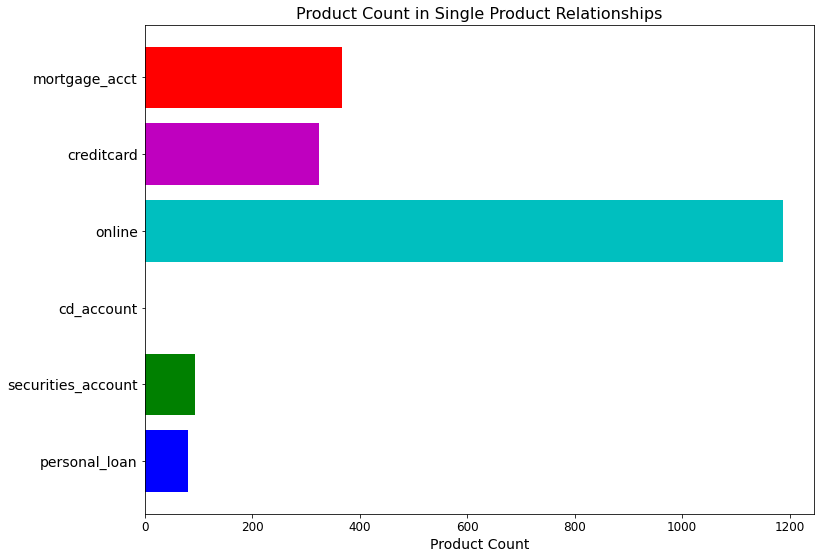

In [ ]:
# Loop to identify total product count for each category when total
# relationship is equal to 1 product only
single_prod = []
for var in binary_vars:
  single_prod.append(bank_df2.loc[bank_df2['total_products'] == 1][var].sum())

# Plot count
colors = ['b', 'g', 'y', 'c', 'm', 'r']
plt.figure(figsize = (12, 9))
plt.barh(y = binary_vars, width = single_prod, color = colors)
plt.title('Product Count in Single Product Relationships', size = 16)
plt.xlabel('Product Count', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 14)
plt.show()

Aside from online banking, mortgage is the single product held most for clients with only one product in addition to deposit accounts. (367)

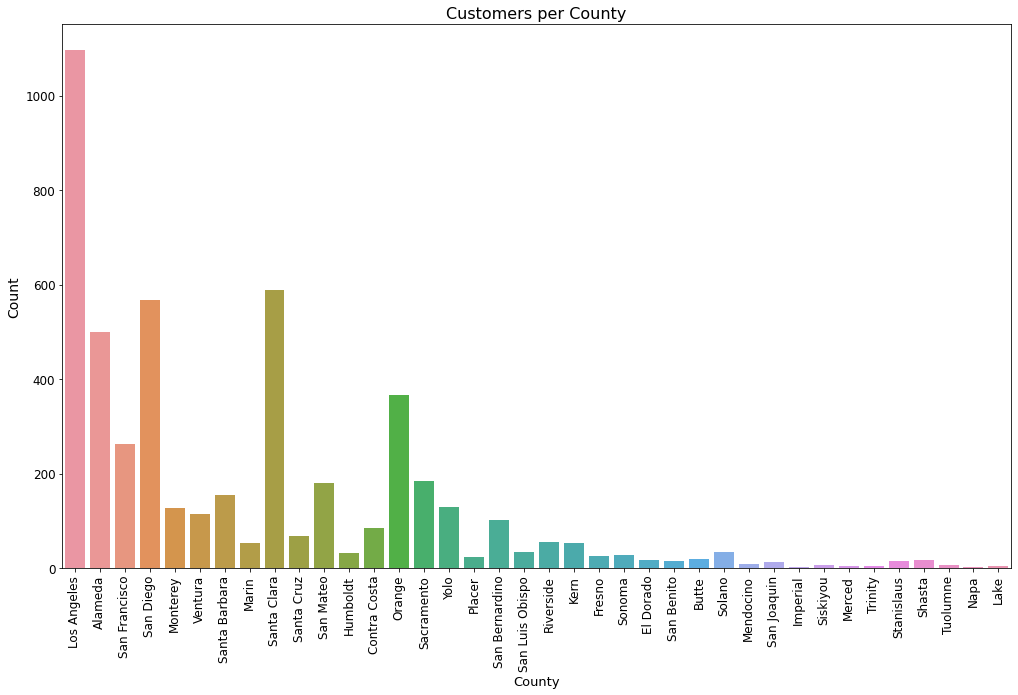

In [ ]:
# Where are the customers?
plt.figure(figsize = (17, 10))
sns.countplot(x = 'county', data = bank_df3)
plt.title('Customers per County', size = 16)
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 12)
plt.xlabel('County', size = 13)
plt.ylabel('Count', size = 14)
plt.show()

Top Counties:
* Los Angeles
* San Diego
* Santa Clara
* Orange

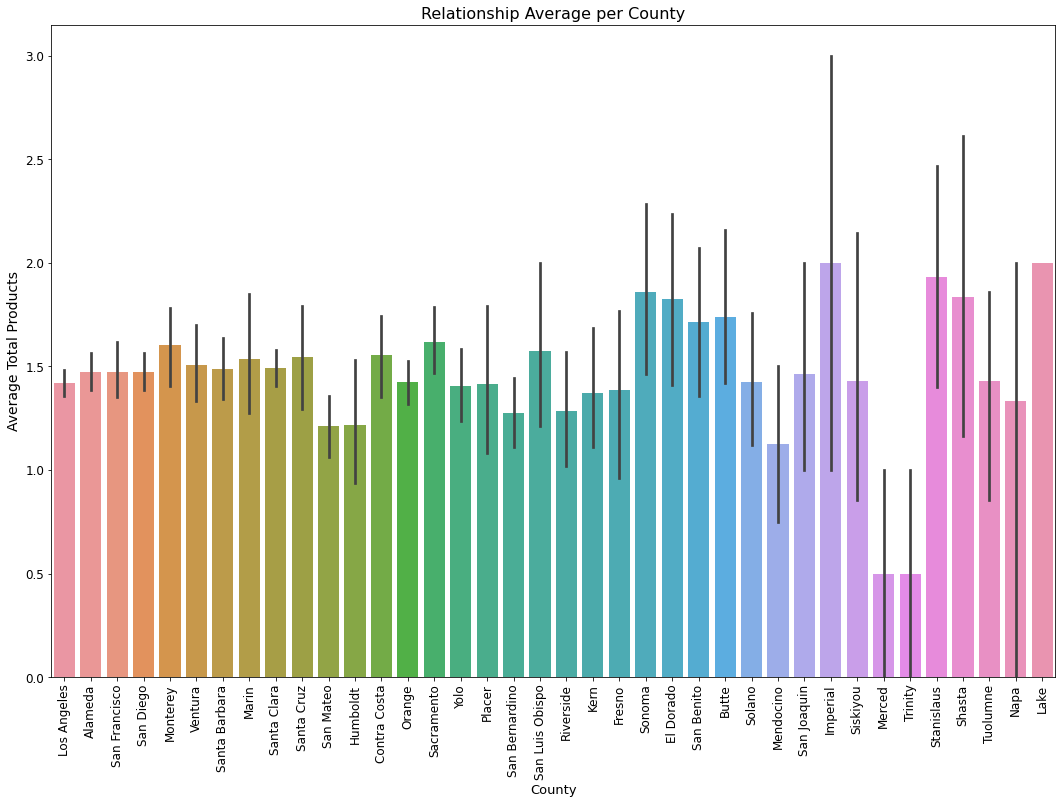

In [ ]:
# What counties show better relationships with customers?
plt.figure(figsize = (18, 12))
sns.barplot(x = 'county', y = 'total_products', data = bank_df3)
plt.title('Relationship Average per County', size = 16)
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 12)
plt.xlabel('County', size = 13)
plt.ylabel('Average Total Products', size = 14)
plt.show()

None of the top 4 counties is ranked among the top 10 counties in terms of average products per customer. The counties with less customers on average have more bank products than other counties (quality over quantity).

Scale dataframe

In [ ]:
# Scale all columns
scaler = StandardScaler()
bank_df2[bank_df2.columns] = scaler.fit_transform(bank_df2[bank_df2.columns])

# Preview dataframe
bank_df2.head()

age  experience    family  mortgage  personal_loan  \
0 -1.774417   -1.674914  1.397414 -0.555524      -0.325875   
1 -0.029524   -0.098936  0.525991 -0.555524      -0.325875   
2 -0.552992   -0.449154 -1.216855 -0.555524      -0.325875   
3 -0.901970   -0.974479 -1.216855 -0.555524      -0.325875   
4 -0.901970   -1.062034  1.397414 -0.555524      -0.325875   

   securities_account  cd_account    online  creditcard  boxcox_income  \
0            2.928915    -0.25354 -1.216618   -0.645314      -0.373048   
1            2.928915    -0.25354 -1.216618   -0.645314      -0.856561   
2           -0.341423    -0.25354 -1.216618   -0.645314      -2.075213   
3           -0.341423    -0.25354 -1.216618   -0.645314       0.723951   
4           -0.341423    -0.25354 -1.216618    1.549632      -0.490122   

   boxcox_ccavg  mortgage_acct  total_products   Alameda     Butte  \
0      0.119408      -0.666522       -0.435709 -0.333333 -0.061762   
1      0.045165      -0.666522       -0.435709 -0.333333 -0.061762   
2     -0.392088      -0.666522       -1.384553  3.000000 -0.061762   
3      0.754026      -0.666522       -1.384553 -0.333333 -0.061762   
4     -0.392088      -0.666522       -0.435709 -0.333333 -0.061762   

   Contra Costa  El Dorado    Fresno  Humboldt  Imperial      Kern      Lake  \
0     -0.131507  -0.058409 -0.072299 -0.080257 -0.024502 -0.104489 -0.028296   
1     -0.131507  -0.058409 -0.072299 -0.080257 -0.024502 -0.104489 -0.028296   
2     -0.131507  -0.058409 -0.072299 -0.080257 -0.024502 -0.104489 -0.028296   
3     -0.131507  -0.058409 -0.072299 -0.080257 -0.024502 -0.104489 -0.028296   
4     -0.131507  -0.058409 -0.072299 -0.080257 -0.024502 -0.104489 -0.028296   

   Los Angeles     Marin  Mendocino    Merced  Monterey      Napa    Orange  \
0     1.887338 -0.104489  -0.040032 -0.028296 -0.162088 -0.024502 -0.281036   
1     1.887338 -0.104489  -0.040032 -0.028296 -0.162088 -0.024502 -0.281036   
2    -0.529847 -0.104489  -0.040032 -0.028296 -0.162088 -0.024502 -0.281036   
3    -0.529847 -0.104489  -0.040032 -0.028296 -0.162088 -0.024502 -0.281036   
4     1.887338 -0.104489  -0.040032 -0.028296 -0.162088 -0.024502 -0.281036   

     Placer  Riverside  Sacramento  San Benito  San Bernardino  San Diego  \
0 -0.069449  -0.106428   -0.195464   -0.052989       -0.143584  -0.357993   
1 -0.069449  -0.106428   -0.195464   -0.052989       -0.143584  -0.357993   
2 -0.069449  -0.106428   -0.195464   -0.052989       -0.143584  -0.357993   
3 -0.069449  -0.106428   -0.195464   -0.052989       -0.143584  -0.357993   
4 -0.069449  -0.106428   -0.195464   -0.052989       -0.143584  -0.357993   

   San Francisco  San Joaquin  San Luis Obispo  San Mateo  Santa Barbara  \
0      -0.235628    -0.051057         -0.08151  -0.192689      -0.178266   
1      -0.235628    -0.051057         -0.08151  -0.192689      -0.178266   
2      -0.235628    -0.051057         -0.08151  -0.192689      -0.178266   
3       4.243985    -0.051057         -0.08151  -0.192689      -0.178266   
4      -0.235628    -0.051057         -0.08151  -0.192689      -0.178266   

   Santa Clara  Santa Cruz    Shasta  Siskiyou   Solano    Sonoma  Stanislaus  \
0    -0.365066    -0.11742 -0.060108 -0.037443 -0.08151 -0.075044   -0.054855   
1    -0.365066    -0.11742 -0.060108 -0.037443 -0.08151 -0.075044   -0.054855   
2    -0.365066    -0.11742 -0.060108 -0.037443 -0.08151 -0.075044   -0.054855   
3    -0.365066    -0.11742 -0.060108 -0.037443 -0.08151 -0.075044   -0.054855   
4    -0.365066    -0.11742 -0.060108 -0.037443 -0.08151 -0.075044   -0.054855   

    Trinity  Tuolumne   Ventura      Yolo  education__Advanced  \
0 -0.028296 -0.037443 -0.152748 -0.163383            -0.654965   
1 -0.028296 -0.037443 -0.152748 -0.163383            -0.654965   
2 -0.028296 -0.037443 -0.152748 -0.163383            -0.654965   
3 -0.028296 -0.037443 -0.152748 -0.163383            -0.654965   
4 -0.028296 -0.037443 -0.152748 -0.163383            -0.654965   

   educat

**Models**

**DBSCAN**

In [ ]:
# Obtain distances through KNN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(bank_df2)
distances, indices = nbrs.kneighbors(bank_df2)

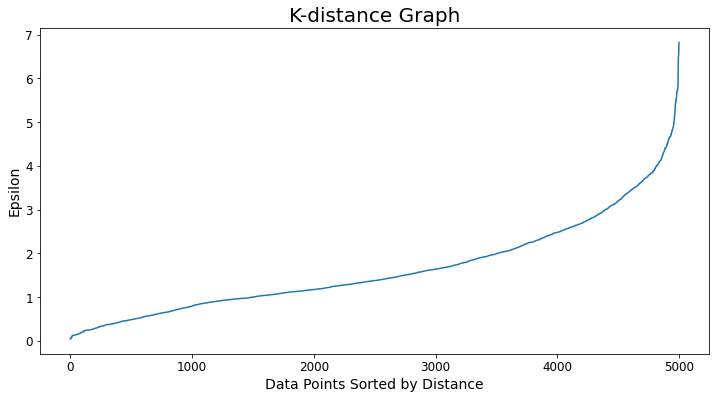

In [ ]:
# Plotting K-distance for epsilon determination
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points Sorted by Distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [ ]:
# Define dbscan clustering: min_samples > 2*dim
dbscan_cluster = DBSCAN(eps = 5, min_samples = 130)

dbscan_labels = dbscan_cluster.fit_predict(bank_df2)

In [ ]:
# Add label to DataFrame
bank_df3['dbscan_labels'] = dbscan_labels

# Silhouette Score
print(metrics.silhouette_score(bank_df2, dbscan_labels, metric='euclidean'))

0.05083276096445794


In [ ]:
bank_df3.groupby('dbscan_labels').mean()

id        age  experience     income    family  \
dbscan_labels                                                            
-1             2571.502681  45.412869   20.221850  78.784182  2.384048   
 0             2458.246631  45.270216   20.056604  72.914420  2.408356   
 1             2512.922131  46.397541   21.155738  65.422131  2.422131   
 2             2577.047619  45.612245   20.367347  65.034014  2.333333   
 3             2535.322148  43.946309   18.758389  63.033557  2.302013   

                  ccavg   mortgage  personal_loan  securities_account  \
dbscan_labels                                                           
-1             3.086830  69.766086       0.162869            0.170241   
 0             2.898759  51.699798       0.075472            0.081199   
 1             2.754235  55.176230       0.040984            0.061475   
 2             2.775850  38.170068       0.000000            0.027211   
 3             2.687360  39.489933       0.020134            0.053691   

               cd_account    online  creditcard  mortgage_acct  total_products  
dbscan_labels                                                                   
-1               0.166890  0.648794    0.349196       0.342493        1.840483  
 0               0.016846  0.572102    0.272237       0.295485        1.313342  
 1               0.012295  0.590164    0.274590       0.307377        1.286885  
 2               0.000000  0.503401    0.210884       0.251701        0.993197  
 3               0.000000  0.671141    0.288591       0.255034        1.288591

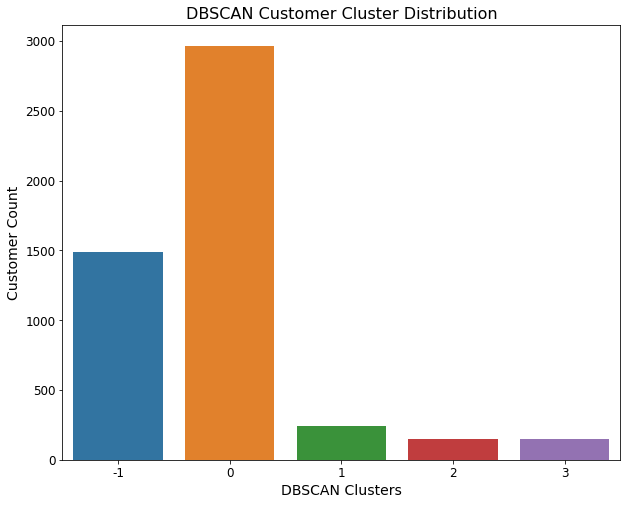

In [ ]:
# Count of the total customers assigned to each cluster
plt.figure(figsize = (10, 8))
sns.countplot(x = 'dbscan_labels', data = bank_df3)
plt.title('DBSCAN Customer Cluster Distribution', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('DBSCAN Clusters', size = 14)
plt.ylabel('Customer Count', size = 14)
plt.show()

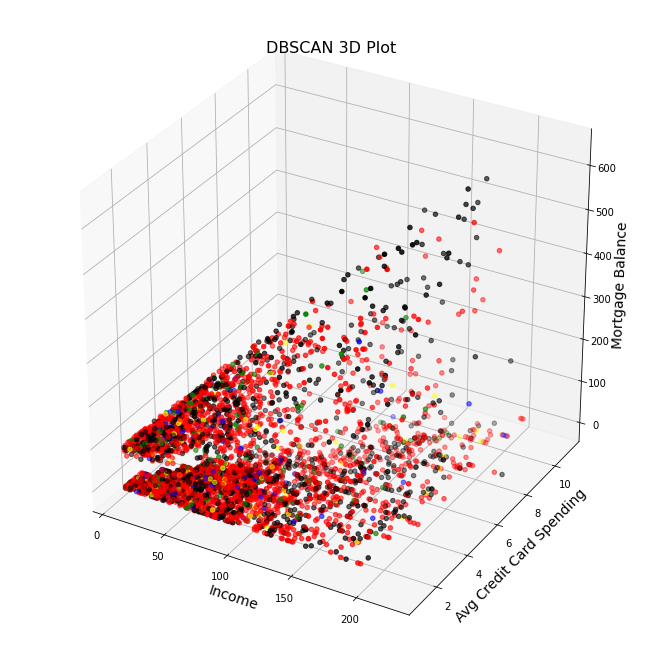

In [ ]:
# 3-D plot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize = (9, 9))
ax = Axes3D(fig)
colors = {0:'red', 1:'green', 2: 'yellow', 3: 'blue', -1: 'black'}
ax.scatter(bank_df3['income'], bank_df3['ccavg'], bank_df3['mortgage'], c=bank_df3["dbscan_labels"].apply(lambda x: colors[x]))
ax.set_title('DBSCAN 3D Plot', size = 16)
ax.set_xlabel('Income', size = 14)
ax.set_ylabel('Avg Credit Card Spending', size = 14)
ax.set_zlabel('Mortgage Balance', size = 14)
pyplot.show()

Observations:

DBSCAN - Obtained better separation in clusters using both categorical and continuous features versus continuous only. However, many data points are labeled as noise with this model and the majority of points are clustered into only one cluster.

Cluster (-1) has the highest average product count. The customers in this cluster also have higher incomes, mortgage balances, and monthly credit card usage.



**k-means**

k-means approach: Will cluster clients based on continuous variables only and analyze resulting clusters with corresponding categorical data.

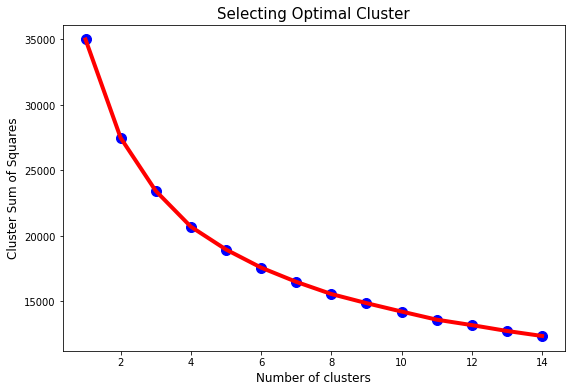

In [ ]:
# Use elbow method to find optimal cluster parameter
# Create list of sum of squares of clusters
X_kmeans = bank_df2[['age', 'experience', 'family', 'mortgage', 'boxcox_income', 'boxcox_ccavg', 'total_products']]
clusters_ss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 2)
    kmeans.fit(X_kmeans)
    clusters_ss.append(kmeans.inertia_)
plt.figure(figsize = (9,6))
plt.scatter(range(1, 15), clusters_ss,c = 'b',s = 100)
plt.plot(range(1, 15), clusters_ss,c = 'r',linewidth = 4)
plt.title('Selecting Optimal Cluster',fontsize = 15)
plt.xlabel('Number of clusters',fontsize = 12)
plt.ylabel('Cluster Sum of Squares',fontsize = 12)
plt.show()

In [ ]:
# Apply k_means and export labels
k_means = KMeans(n_clusters = 4, random_state = 2)
cluster_labels = k_means.fit_predict(X_kmeans)

In [ ]:
# Silhouette Score
print(metrics.silhouette_score(bank_df2, cluster_labels, metric='euclidean'))

0.03555940018616659


In [ ]:
# Attach cluster labels to the copied DataFrame
bank_df3['kmeans_labels'] = cluster_labels

In [ ]:
# Observe cluster labels and means across continuous variables
bank_df3.groupby('kmeans_labels').mean()

id        age  experience      income    family  \
kmeans_labels                                                             
0              2471.808342  44.806356   19.726912  124.063555  1.863952   
1              2527.597426  34.507353    9.276348   54.685662  2.709559   
2              2508.349398  55.830178   30.561102   49.927137  2.465863   
3              2453.555016  45.216828   20.029126  109.496764  2.241100   

                  ccavg    mortgage  personal_loan  securities_account  \
kmeans_labels                                                            
0              5.023337    7.754717       0.273088            0.117180   
1              2.213521   32.068627       0.020221            0.093750   
2              2.112144   32.282846       0.011474            0.095812   
3              3.781769  268.737864       0.245955            0.135922   

               cd_account    online  creditcard  mortgage_acct  \
kmeans_labels                                                    
0                0.106256  0.606753    0.314796       0.068520   
1                0.029412  0.558211    0.268995       0.250000   
2                0.029260  0.601262    0.281124       0.254733   
3                0.155340  0.669903    0.362460       0.998382   

               total_products  dbscan_labels  
kmeans_labels                                 
0                    1.486594      -0.161867  
1                    1.220588      -0.041667  
2                    1.273666      -0.056225  
3                    2.567961      -0.288026

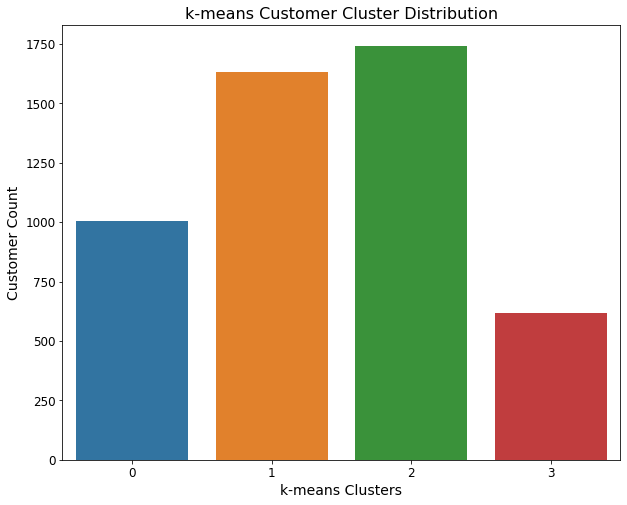

In [ ]:
# Count of the total customers assigned to each cluster
plt.figure(figsize = (10, 8))
sns.countplot(x = 'kmeans_labels', data = bank_df3)
plt.title('k-means Customer Cluster Distribution', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('k-means Clusters', size = 14)
plt.ylabel('Customer Count', size = 14)
plt.show()

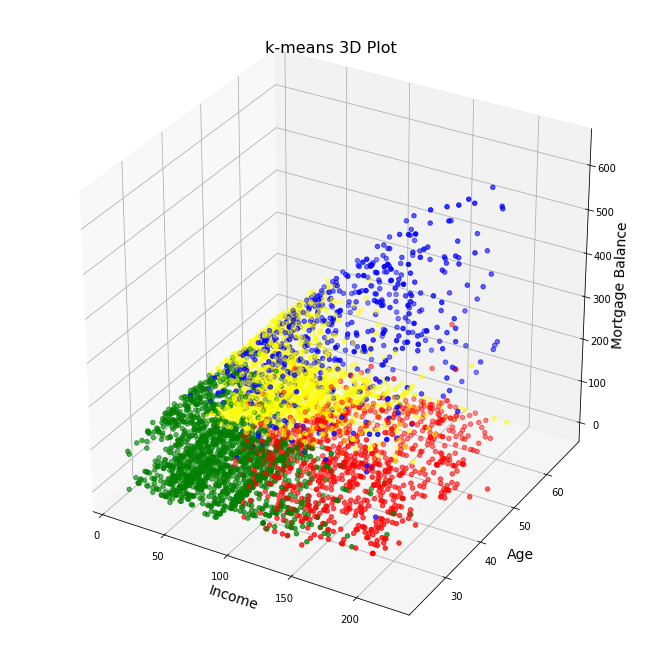

In [ ]:
# 3-D plot for k-means
fig = pyplot.figure(figsize = (9, 9))
ax = Axes3D(fig)
colors = {0:'red', 1:'green', 2: 'yellow', 3: 'blue'}
ax.scatter(bank_df3['income'], bank_df3['age'], bank_df3['mortgage'], c=bank_df3["kmeans_labels"].apply(lambda x: colors[x]))
ax.set_title('k-means 3D Plot', size = 16)
ax.set_xlabel('Income', size = 14)
ax.set_ylabel('Age', size = 14)
ax.set_zlabel('Mortgage Balance', size = 14)
pyplot.show()

Observsations:

k-means: Much better distinction between clusters. Income, mortgage, and age are among several features along which clusters indicate greater separation.

**AGGLOMERATIVE**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Instantiate model
bank_agg = AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 5)
agg_labels = bank_agg.fit_predict(bank_df2)

# Assign labels for clusters to DataFrame
bank_df3['agg_labels'] = agg_labels

In [ ]:
# Silhouette Score
print(metrics.silhouette_score(bank_df2, agg_labels, metric='euclidean'))

0.014424158640236275


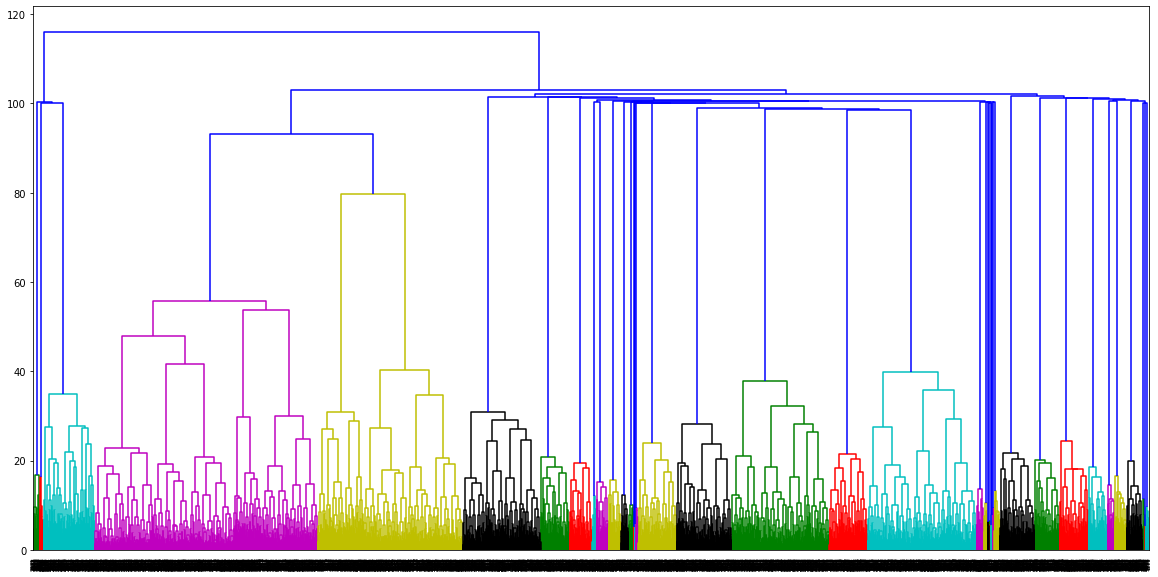

In [ ]:
# Plot dendrogram for model
plt.figure(figsize = (20, 10))
dendrogram(linkage(bank_df2, method = 'ward'))
plt.show()

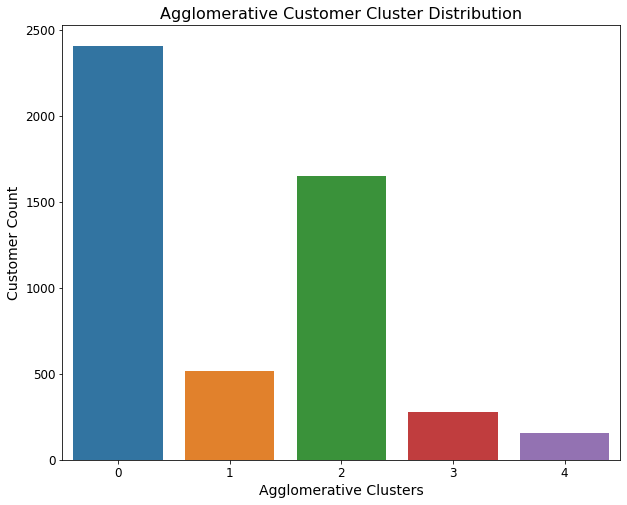

In [ ]:
# Count of the total customers assigned to each cluster
plt.figure(figsize = (10, 8))
sns.countplot(x = 'agg_labels', data = bank_df3)
plt.title('Agglomerative Customer Cluster Distribution', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Agglomerative Clusters', size = 14)
plt.ylabel('Customer Count', size = 14)
plt.show()

In [ ]:
# Continuous feature means per cluster
bank_df3.groupby(agg_labels).mean()

id        age  experience      income    family     ccavg  \
0  2479.629414  45.385542   20.181138   68.208143  2.399252  2.785875   
1  2601.385214  45.268482   20.066148   75.533074  2.348249  3.049708   
2  2505.449091  45.071515   19.853333   77.183636  2.407273  2.993263   
3  2414.709091  46.203636   21.018182  100.836364  2.498182  3.768242   
4  2590.155844  46.149351   20.922078   70.045455  2.214286  2.865368   

    mortgage  personal_loan  securities_account  cd_account    online  \
0  54.145409       0.036975            0.081014    0.008725  0.583299   
1  55.747082       0.112840            0.114786    0.071984  0.622568   
2  53.256970       0.124242            0.080000    0.000000  0.558182   
3  93.589091       0.425455            0.425455    0.865455  0.898182   
4  64.292208       0.071429            0.123377    0.038961  0.597403   

   creditcard  mortgage_acct  total_products  dbscan_labels  kmeans_labels  \
0    0.264229       0.309514        1.283756       0.160366       1.439967   
1    0.338521       0.311284        1.571984      -1.000000       1.334630   
2    0.252727       0.289091        1.304242      -0.003636       1.321212   
3    0.712727       0.370909        3.698182      -0.796364       1.480000   
4    0.305195       0.350649        1.487013      -1.000000       1.512987   

   agg_labels  
0           0  
1           1  
2           2  
3           3  
4           4

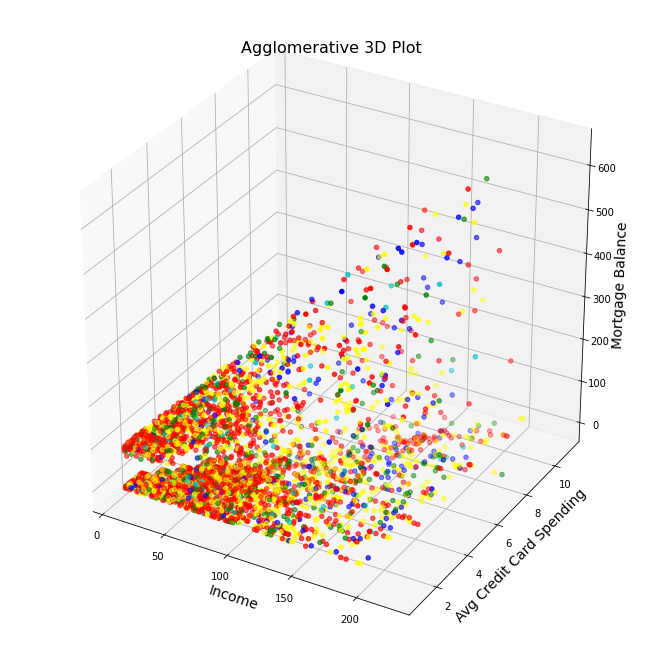

In [ ]:
# 3-D plot Agglomerative
fig = pyplot.figure(figsize = (9, 9))
ax = Axes3D(fig)
colors = {0:'red', 1:'green', 2: 'yellow', 3: 'blue', 4: 'c'}
ax.scatter(bank_df3['income'], bank_df3['ccavg'], bank_df3['mortgage'], c=bank_df3["agg_labels"].apply(lambda x: colors[x]))
ax.set_title('Agglomerative 3D Plot', size = 16)
ax.set_xlabel('Income', size = 14)
ax.set_ylabel('Avg Credit Card Spending', size = 14)
ax.set_zlabel('Mortgage Balance', size = 14)
pyplot.show()

Observations:

Agglomerative:
Income, total products, and average credit card usage are separating factors between the five clusters. Of the five clusters, two contain the majority of the customers.

Cluster three distinguishes itself as the set of customers with the most bank products and has the highest income, average mortgage balance, and credit card usage volume; an ongoing similar trend.

**GMM**

In [ ]:
# GMM Model
gmm_cluster = GaussianMixture(n_components = 4, random_state = 2)

gmm_labels = gmm_cluster.fit_predict(bank_df2)

# Add the labels to dataframe
bank_df3['gmm_labels'] = gmm_labels

In [ ]:
# Silhouette Score
print(metrics.silhouette_score(bank_df2, gmm_labels, metric='euclidean'))

0.09033769020029829


In [ ]:
# Continuous feature means per cluster
bank_df3.groupby('gmm_labels').mean()

id        age  experience     income    family     ccavg  \
gmm_labels                                                                      
0           2651.342105  47.517544   22.184211  72.456140  2.403509  2.880409   
1           2514.414474  45.414474   20.197697  72.299671  2.388816  2.902993   
2           2451.977751  45.042093   19.856284  76.920625  2.407697  3.013199   
3           2616.327869  45.409836   20.213115  70.497268  2.415301  2.869672   

              mortgage  personal_loan  securities_account  cd_account  \
gmm_labels                                                              
0            56.807018       0.096491            0.070175    0.061404   
1             0.000000       0.069737            0.082895    0.000000   
2           159.759471       0.148527            0.150932    0.173782   
3            56.491803       0.054645            0.060109    0.032787   

              online  creditcard  mortgage_acct  total_products  \
gmm_labels                                                        
0           0.631579    0.342105       0.307018        1.508772   
1           0.578289    0.266447       0.000000        0.997368   
2           0.638605    0.347565       0.869513        2.328924   
3           0.502732    0.234973       0.311475        1.196721   

            dbscan_labels  kmeans_labels  agg_labels  
gmm_labels                                            
0               -1.000000       1.447368    1.000000  
1               -0.068421       1.127303    1.003947  
2               -0.266386       1.882141    1.245340  
3                1.409836       1.366120    0.098361

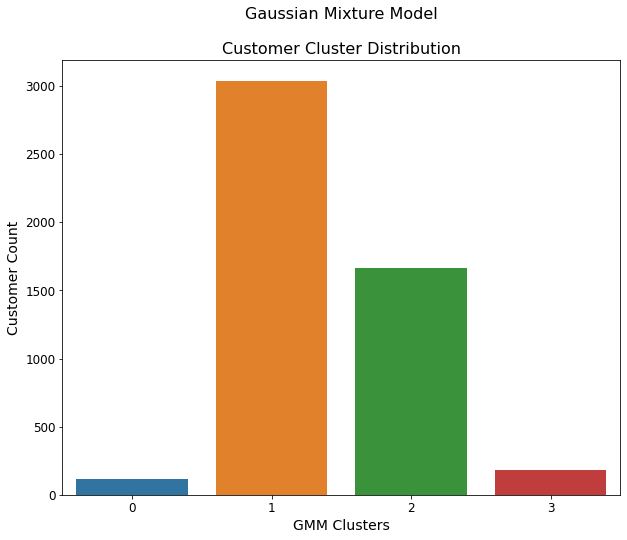

In [ ]:
# Count of the total customers assigned to each cluster
plt.figure(figsize = (10, 8))
sns.countplot(x = 'gmm_labels', data = bank_df3)
plt.title('Gaussian Mixture Model\n\nCustomer Cluster Distribution', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('GMM Clusters', size = 14)
plt.ylabel('Customer Count', size = 14)
plt.show()

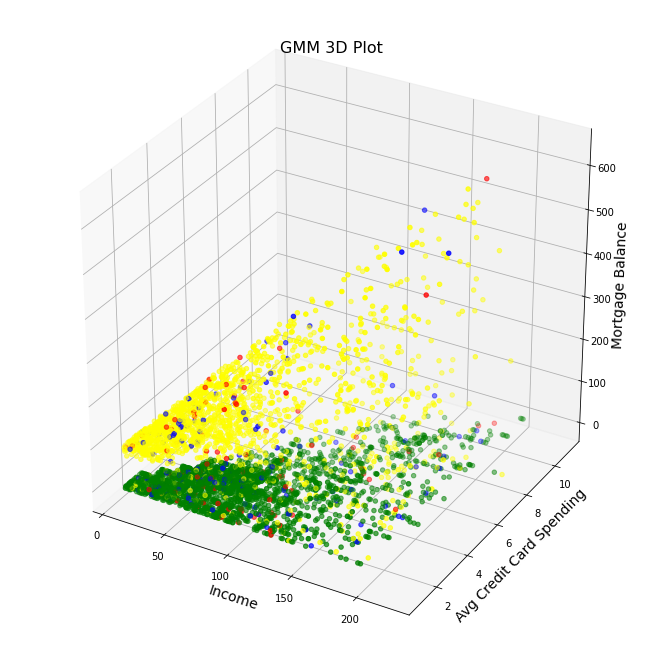

In [ ]:
# 3-D plot for GMM
fig = pyplot.figure(figsize = (9, 9))
ax = Axes3D(fig)
colors = {0:'red', 1:'green', 2: 'yellow', 3: 'blue'}
ax.scatter(bank_df3['income'], bank_df3['ccavg'], bank_df3['mortgage'], c=bank_df3["gmm_labels"].apply(lambda x: colors[x]))
ax.set_title('GMM 3D Plot', size = 16)
ax.set_xlabel('Income', size = 14)
ax.set_ylabel('Avg Credit Card Spending', size = 14)
ax.set_zlabel('Mortgage Balance', size = 14)
pyplot.show()

Observations:

GMM:
Significant cluster separation exists between one and two only. (Mortgage and non-mortgage clients)

Multiple product customers are in cluster two with an average of 2.32 products per customer; the cluster also has highest mortgage balances and credit card usage volume.


**K-Prototype**

In [ ]:
# Install
!pip install --upgrade kmodes

# Create mixed dataframe for model
bank_df_proto = bank_df3.drop(columns = ['id', 'kmeans_labels', 'dbscan_labels'])

In [ ]:
# Preview dataframe
bank_df_proto.head()

age  experience  income  family  ccavg  education  mortgage  personal_loan  \
0   25         1.0      49       4    2.6  Undergrad         0              0   
1   45        19.0      34       3    2.5  Undergrad         0              0   
2   39        15.0      11       1    2.0  Undergrad         0              0   
3   35         9.0     100       1    3.7   Graduate         0              0   
4   35         8.0      45       4    2.0   Graduate         0              0   

   securities_account  cd_account  online  creditcard         county  \
0                   1           0       0           0    Los Angeles   
1                   1           0       0           0    Los Angeles   
2                   0           0       0           0        Alameda   
3                   0           0       0           0  San Francisco   
4                   0           0       0           1    Los Angeles   

   mortgage_acct  total_products  agg_labels  gmm_labels  
0            0.0             1.0           2           1  
1            0.0             1.0           2           1  
2            0.0             0.0           0           1  
3            0.0             0.0           0           1  
4            0.0             1.0           2           1

In [ ]:
# Add the transformed income and credit card usage prior to scaling new dataframe
bank_df_proto['boxcox_income'],_ = stats.boxcox(bank_df_proto.income)
bank_df_proto['boxcox_ccavg'],_ = stats.boxcox(bank_df_proto.ccavg)

# Drop columns not needed
bank_df_proto = bank_df_proto.drop(columns = ['income', 'ccavg', 'agg_labels', 'gmm_labels'])

In [ ]:
# Change binary to yes or no strings
bank_df_proto.loc[bank_df_proto['personal_loan'] == 1, 'personal_loan'] = 'Yes'
bank_df_proto.loc[bank_df_proto['personal_loan'] == 0, 'personal_loan'] = 'No'

bank_df_proto.loc[bank_df_proto['securities_account'] == 1, 'securities_account'] = 'Yes'
bank_df_proto.loc[bank_df_proto['securities_account'] == 0, 'securities_account'] = 'No'

bank_df_proto.loc[bank_df_proto['cd_account'] == 1, 'cd_account'] = 'Yes'
bank_df_proto.loc[bank_df_proto['cd_account'] == 0, 'cd_account'] = 'No'

bank_df_proto.loc[bank_df_proto['online'] == 1, 'online'] = 'Yes'
bank_df_proto.loc[bank_df_proto['online'] == 0, 'online'] = 'No'

bank_df_proto.loc[bank_df_proto['creditcard'] == 1, 'creditcard'] = 'Yes'
bank_df_proto.loc[bank_df_proto['creditcard'] == 0, 'creditcard'] = 'No'

In [ ]:
# Preview DataFrame
bank_df_proto.head()

age  experience  family  education  mortgage personal_loan  \
0   25         1.0       4  Undergrad         0            No   
1   45        19.0       3  Undergrad         0            No   
2   39        15.0       1  Undergrad         0            No   
3   35         9.0       1   Graduate         0            No   
4   35         8.0       4   Graduate         0            No   

  securities_account cd_account online creditcard         county  \
0                Yes         No     No         No    Los Angeles   
1                Yes         No     No         No    Los Angeles   
2                 No         No     No         No        Alameda   
3                 No         No     No         No  San Francisco   
4                 No         No     No        Yes    Los Angeles   

   mortgage_acct  total_products  boxcox_income  boxcox_ccavg  
0            0.0             1.0       6.994487      0.845150  
1            0.0             1.0       5.974230      0.814468  
2            0.0             0.0       3.402765      0.633771  
3            0.0             0.0       9.309254      1.107409  
4            0.0             1.0       6.747451      0.633771

In [ ]:
# Scale numeric features
bank_df_proto[['age', 'experience', 'boxcox_income', 'family', 'boxcox_ccavg', 'mortgage',	'total_products']] = scaler.fit_transform(bank_df_proto[['age', 'experience', 'boxcox_income', 'family', 'boxcox_ccavg', 'mortgage',	'total_products']])

# Create array from DataFrame
bank_df_proto_array = bank_df_proto.values

In [ ]:
# Create k-prototype model
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters = 4, max_iter = 25, random_state = 2)

# Identify categorical columns
kproto_labels = kproto.fit_predict(bank_df_proto_array, categorical = [3, 5, 6, 7, 8, 9, 10])

In [ ]:
# Assign labels to prototype model dataframe
kproto_lab = []
for c in kproto_labels:
  kproto_lab.append(c)

bank_df3['kproto_label'] = kproto_lab

In [ ]:
# Silhouette Score
print(metrics.silhouette_score(bank_df2, kproto_lab, metric='euclidean'))

0.03543172438607583


In [ ]:
# Count totals for clusters
bank_df3.groupby('kproto_label')['id'].count()

kproto_label
0    1010
1    1705
2     695
3    1590
Name: id, dtype: int64

In [ ]:
# Continuous feature means per cluster
bank_df3.groupby('kproto_label').mean()

id        age  experience      income    family  \
kproto_label                                                             
0             2472.673267  44.671287   19.591089  123.201980  1.873267   
1             2505.801760  55.902053   30.627566   49.449267  2.473900   
2             2446.769784  45.315108   20.161151  106.591367  2.251799   
3             2535.976730  34.444654    9.201887   54.116352  2.708805   

                 ccavg    mortgage  personal_loan  securities_account  \
kproto_label                                                            
0             4.957855    4.923762       0.267327            0.115842   
1             2.106725   30.103226       0.011144            0.093842   
2             3.743933  255.669065       0.230216            0.133813   
3             2.193795   30.506289       0.019497            0.095597   

              cd_account    online  creditcard  mortgage_acct  total_products  \
kproto_label                                                                    
0               0.105941  0.604950    0.316832       0.045545        1.456436   
1               0.026979  0.600000    0.279765       0.241642        1.253372   
2               0.148201  0.667626    0.358273       0.998561        2.536691   
3               0.028931  0.557233    0.266667       0.242767        1.210692   

              dbscan_labels  kmeans_labels  agg_labels  gmm_labels  
kproto_label                                                        
0                 -0.139604       0.031683    1.212871    1.200990  
1                 -0.060997       1.999413    0.955425    1.303812  
2                 -0.266187       2.791367    1.207194    1.987050  
3                 -0.048428       1.000629    0.982390    1.319497

Age, experience, income, mortgage, credit card usage, and total products show separation between clusters.

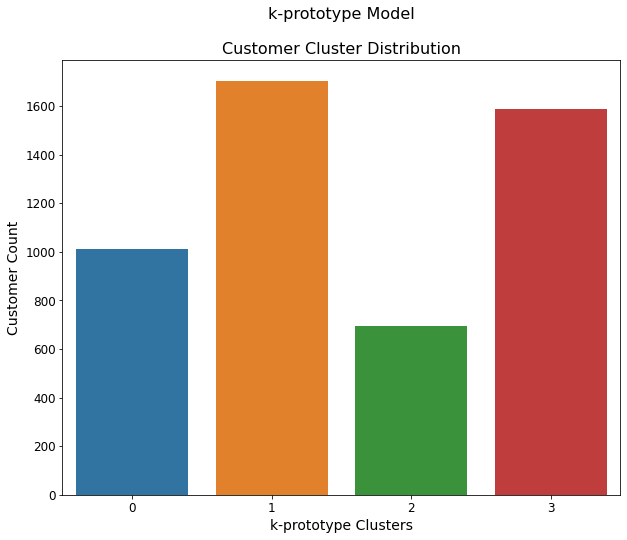

In [ ]:
# Count of the total customers assigned to each cluster
plt.figure(figsize = (10, 8))
sns.countplot(x = 'kproto_label', data = bank_df3)
plt.title('k-prototype Model\n\nCustomer Cluster Distribution', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('k-prototype Clusters', size = 14)
plt.ylabel('Customer Count', size = 14)
plt.show()

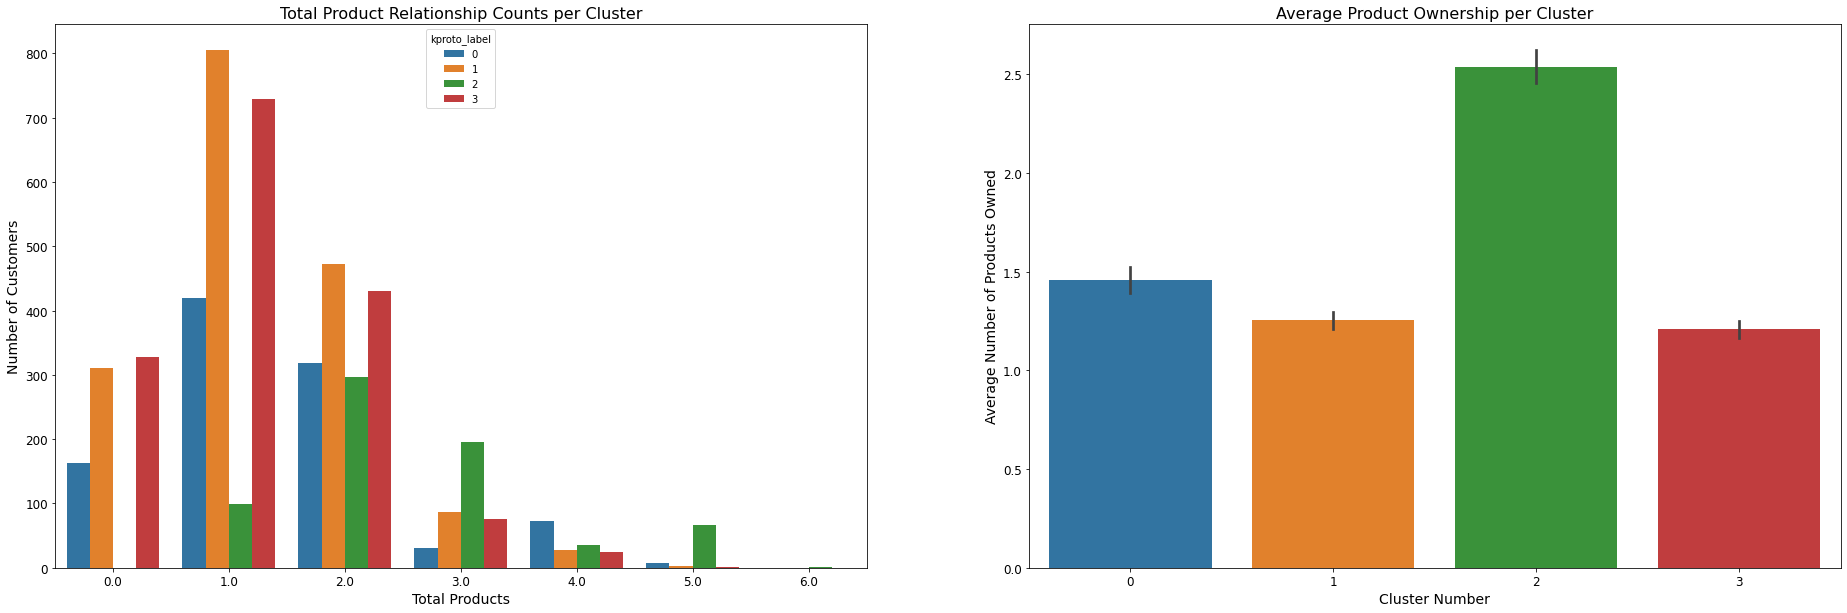

In [ ]:
# plot of the total product relationship pertaining to each cluster
plt.figure(figsize = (32, 10))
plt.subplot(1, 2, 1)
sns.countplot(x = 'total_products', data = bank_df3, hue = 'kproto_label')
plt.title('Total Product Relationship Counts per Cluster', size = 16)
plt.xlabel('Total Products', size = 14)
plt.ylabel('Number of Customers', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)

# Plot the average product count per each cluster
plt.subplot(1, 2, 2)
sns.barplot(x = bank_df3.kproto_label, y = bank_df3.total_products)
plt.title('Average Product Ownership per Cluster', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Average Number of Products Owned', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

Cluster number 2 has the highest average products per customer and cluster number 3 shows the greatest room for improvement

4 clusters have a more even representation in comparison to other models where one cluster dominates others.

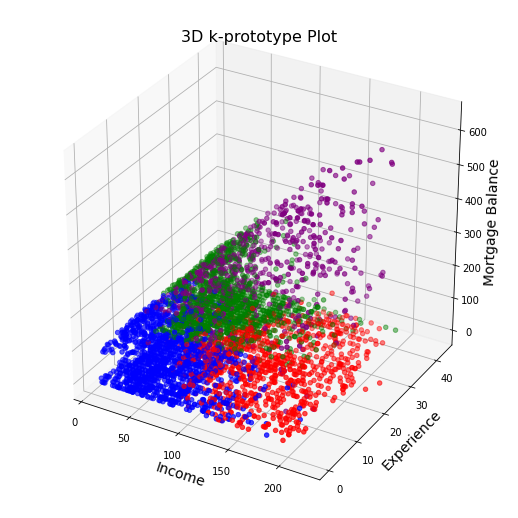

In [ ]:
# 3-D plot for k-prototype
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize = (7, 7))
ax = Axes3D(fig)
colors = {0:'red', 1:'green', 2: 'purple', 3: 'blue'}
ax.scatter(bank_df3['income'], bank_df3['experience'], bank_df3['mortgage'], c=bank_df3["kproto_label"].apply(lambda x: colors[x]))
ax.set_title('3D k-prototype Plot', size = 16)
ax.set_xlabel('Income', size = 14)
ax.set_ylabel('Experience', size = 14)
ax.set_zlabel('Mortgage Balance', size = 14)
pyplot.show()

Distinct clusters are visible in 3D plot

**k-prototype analysis**

In [ ]:
# remove other model labels from DataFrame
bank_final = bank_df3.drop(columns = ['dbscan_labels', 'kmeans_labels', 'agg_labels', 'gmm_labels'])
bank_final.head()

id  age  experience  income  family  ccavg  education  mortgage  \
0   1   25         1.0      49       4    2.6  Undergrad         0   
1   2   45        19.0      34       3    2.5  Undergrad         0   
2   3   39        15.0      11       1    2.0  Undergrad         0   
3   4   35         9.0     100       1    3.7   Graduate         0   
4   5   35         8.0      45       4    2.0   Graduate         0   

   personal_loan  securities_account  cd_account  online  creditcard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

          county  mortgage_acct  total_products  kproto_label  
0    Los Angeles            0.0             1.0             3  
1    Los Angeles            0.0             1.0             3  
2        Alameda            0.0             0.0             3  
3  San Francisco            0.0             0.0             0  
4    Los Angeles            0.0             1.0             3

In [ ]:
# 3D plot - interactive
import plotly as py

trace1 = go.Scatter3d(
    x= bank_final['income'],
    y= bank_final['experience'],
    z= bank_final['mortgage'],
    mode='markers',
     marker=dict(
        color = bank_final['kproto_label'], 
        size= 20,
        line=dict(
            color= bank_final['kproto_label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'k-prototype 3D Cluster Plot',
    scene = dict(
            xaxis = dict(title  = 'Income'),
            yaxis = dict(title  = 'Experience'),
            zaxis = dict(title  = 'Mortgage Balance')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Cluster #1 Analysis

Cluster 2 has customers that on average own between 2 and 3 bank products

In [ ]:
# Continuous feature means per cluster
bank_final.groupby('kproto_label').mean()

id        age  experience      income    family  \
kproto_label                                                             
0             2472.673267  44.671287   19.591089  123.201980  1.873267   
1             2505.801760  55.902053   30.627566   49.449267  2.473900   
2             2446.769784  45.315108   20.161151  106.591367  2.251799   
3             2535.976730  34.444654    9.201887   54.116352  2.708805   

                 ccavg    mortgage  personal_loan  securities_account  \
kproto_label                                                            
0             4.957855    4.923762       0.267327            0.115842   
1             2.106725   30.103226       0.011144            0.093842   
2             3.743933  255.669065       0.230216            0.133813   
3             2.193795   30.506289       0.019497            0.095597   

              cd_account    online  creditcard  mortgage_acct  total_products  
kproto_label                                                                   
0               0.105941  0.604950    0.316832       0.045545        1.456436  
1               0.026979  0.600000    0.279765       0.241642        1.253372  
2               0.148201  0.667626    0.358273       0.998561        2.536691  
3               0.028931  0.557233    0.266667       0.242767        1.210692

In [ ]:
# Continuous feature means per cluster
bank_final.groupby('kproto_label')['income'].describe()

count        mean        std   min   25%    50%     75%    max
kproto_label                                                                 
0             1010.0  123.201980  39.484975  39.0  88.0  123.0  154.00  224.0
1             1705.0   49.449267  28.867329   8.0  28.0   43.0   64.00  195.0
2              695.0  106.591367  43.542717  28.0  72.0   95.0  139.50  205.0
3             1590.0   54.116352  30.158147   8.0  32.0   48.0   72.75  194.0

Cluster 2 Average Income: $ 106591.0 




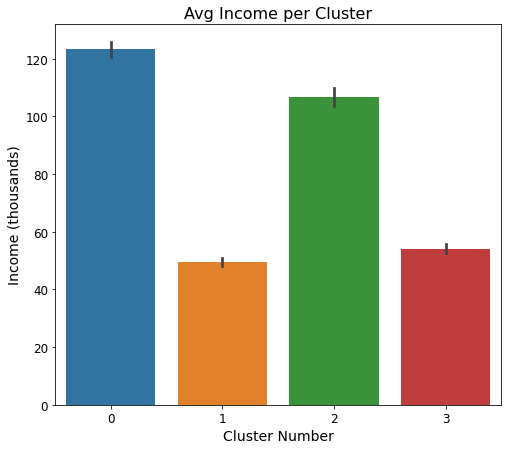

In [ ]:
# Plot average income for each cluster and identify the income for cluster 2
plt.figure(figsize = (8, 7))
sns.barplot(x = 'kproto_label', y = 'income', data = bank_final)
plt.title('Avg Income per Cluster', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Income (thousands)', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)

print('Cluster 2 Average Income: $', round(bank_final.loc[bank_final['kproto_label'] == 2]['income'].mean() * 1000,0), '\n\n')

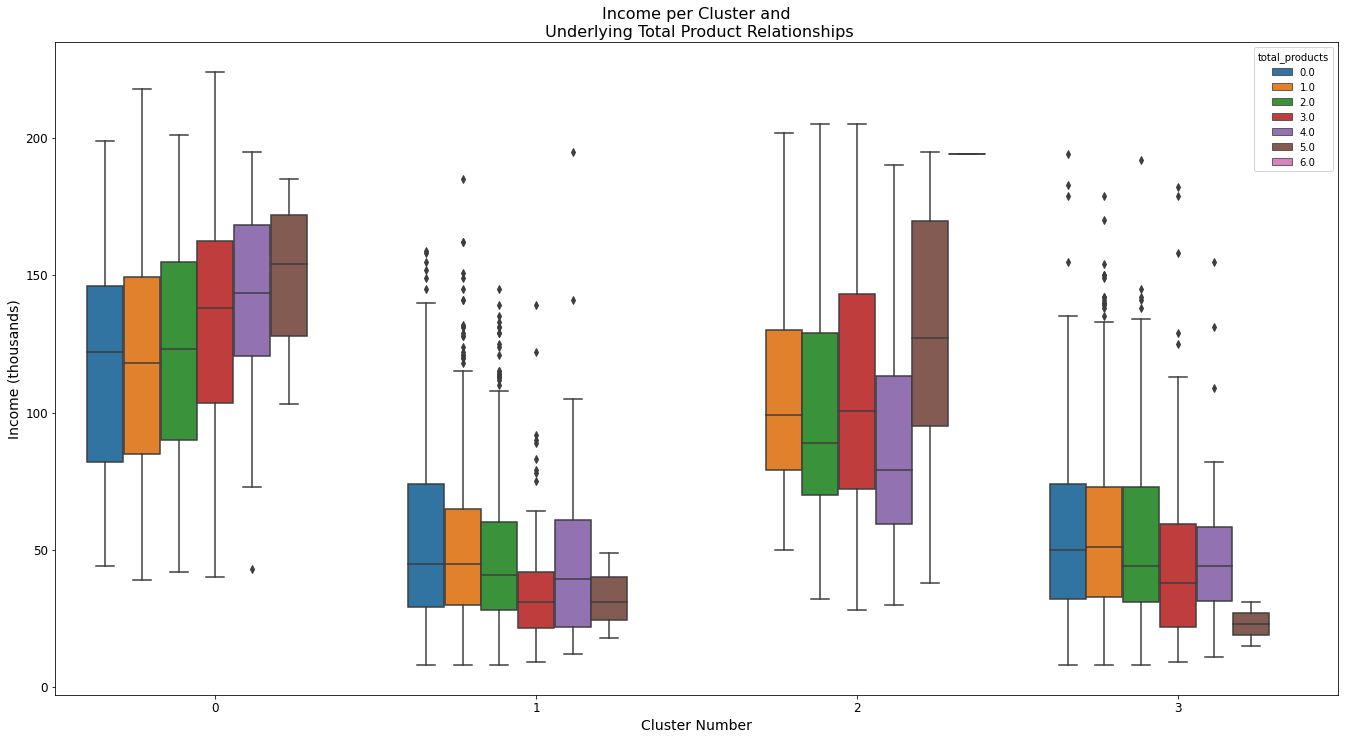

In [ ]:
# Get continuous variable data for cluster 2
# Income analysis of each cluster and relationships in cluster
plt.figure(figsize = (23, 12))
sns.boxplot(x = 'kproto_label', y = 'income', data = bank_final, hue = 'total_products')
plt.title('Income per Cluster and\n Underlying Total Product Relationships', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Income (thousands)', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

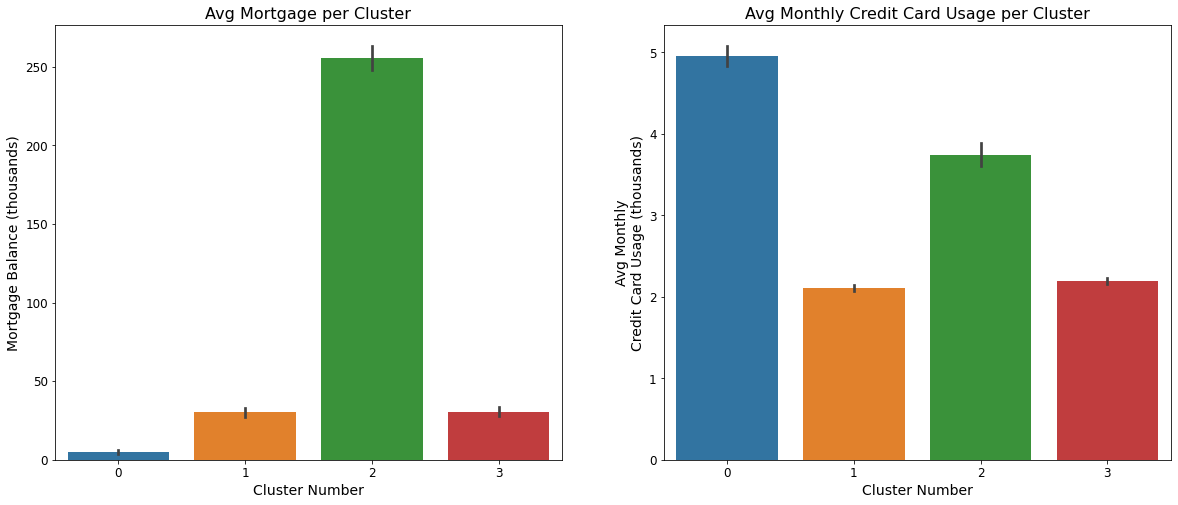



Cluster 2 Average Mortgage Balance: $ 255669.0
Cluster 2 Average Monthly Credit Card Usage: $ 3744.0


In [ ]:
# A look at the lending trends (mortgages and credit cards)
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
sns.barplot(x = 'kproto_label', y = 'mortgage', data = bank_final)
plt.title('Avg Mortgage per Cluster', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Mortgage Balance (thousands)', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(1,2,2)
sns.barplot(x = 'kproto_label', y = 'ccavg', data = bank_final)
plt.title('Avg Monthly Credit Card Usage per Cluster', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Avg Monthly\nCredit Card Usage (thousands)', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

# Print actual values corresponding to cluster 2
print('\n\nCluster 2 Average Mortgage Balance: $', round(bank_final.loc[bank_final['kproto_label'] == 2]['mortgage'].mean() * 1000,0))
print('Cluster 2 Average Monthly Credit Card Usage: $', round(bank_final.loc[bank_final['kproto_label'] == 2]['ccavg'].mean() * 1000,0))

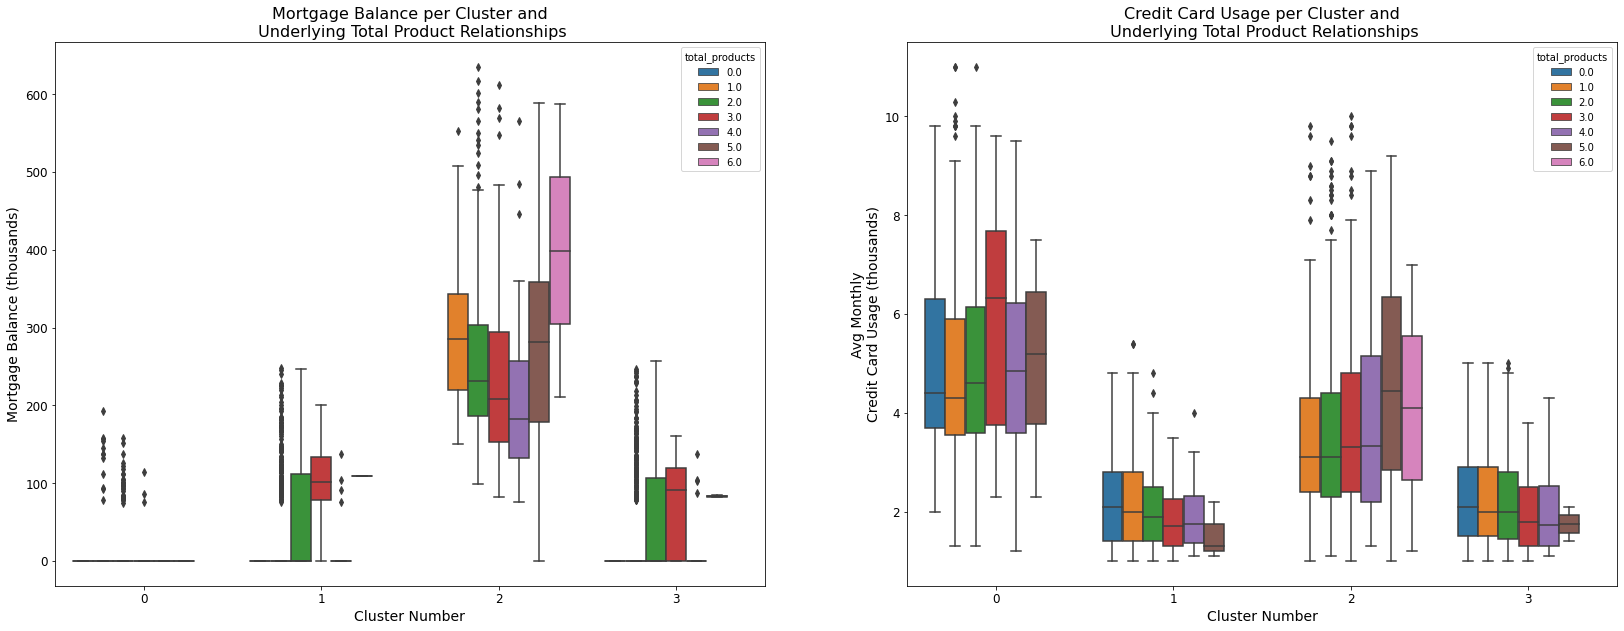

In [ ]:
# Mortgage and Credit Card analysis of each cluster and relationships in cluster
plt.figure(figsize = (28, 10))
plt.subplot(1,2,1)
sns.boxplot(x = 'kproto_label', y = 'mortgage', data = bank_final, hue = 'total_products')
plt.title('Mortgage Balance per Cluster and\n Underlying Total Product Relationships', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Mortgage Balance (thousands)', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(1,2,2)
sns.boxplot(x = 'kproto_label', y = 'ccavg', data = bank_final, hue = 'total_products')
plt.title('Credit Card Usage per Cluster and\n Underlying Total Product Relationships', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Avg Monthly\nCredit Card Usage (thousands)', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

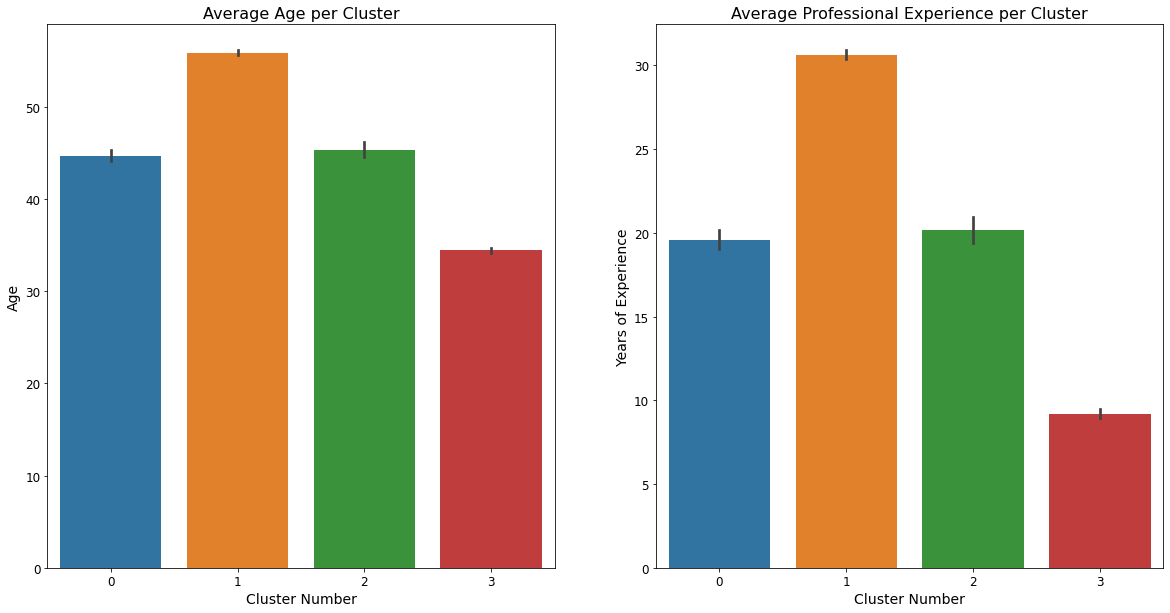



Cluster 2 Average Age:  45.0 years.
Cluster 2 Average Experience:  20.0 years.


In [ ]:
# Age and Experience for Clusters
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.barplot(x = 'kproto_label', y = 'age', data = bank_final)
plt.title('Average Age per Cluster', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Age', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(1,2,2)
sns.barplot(x = 'kproto_label', y = 'experience', data = bank_final)
plt.title('Average Professional Experience per Cluster', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Years of Experience', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

print('\n\nCluster 2 Average Age: ', round(bank_final.loc[bank_final['kproto_label'] == 2]['age'].mean(),0), 'years.')
print('Cluster 2 Average Experience: ', round(bank_final.loc[bank_final['kproto_label'] == 2]['experience'].mean(),0), 'years.')

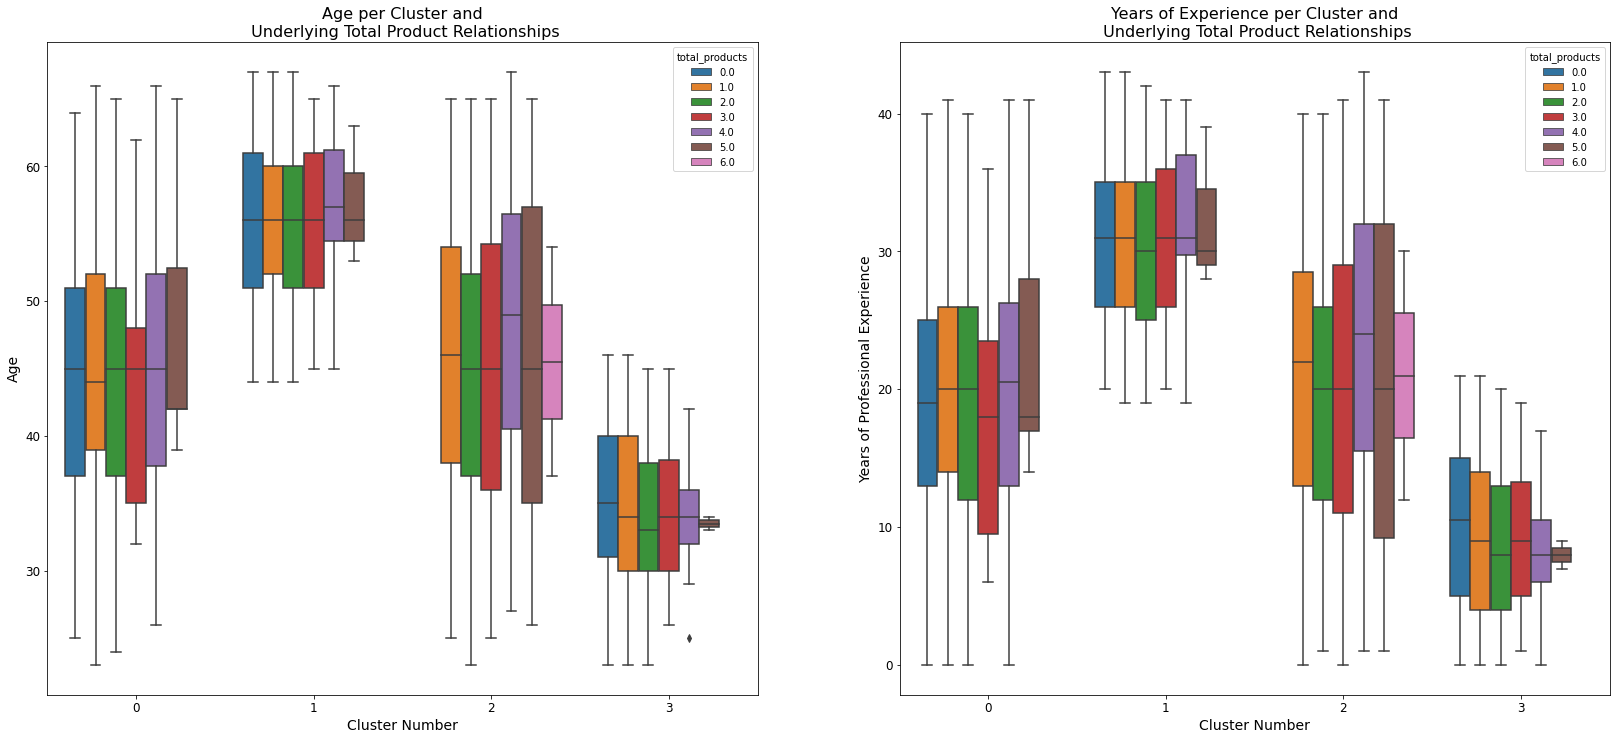

In [ ]:
# Age and experience analysis of each cluster and relationships in cluster
plt.figure(figsize = (28, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'kproto_label', y = 'age', data = bank_final, hue = 'total_products')
plt.title('Age per Cluster and\n Underlying Total Product Relationships', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Age', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(1,2,2)
sns.boxplot(x = 'kproto_label', y = 'experience', data = bank_final, hue = 'total_products')
plt.title('Years of Experience per Cluster and\n Underlying Total Product Relationships', size = 16)
plt.xlabel('Cluster Number', size = 14)
plt.ylabel('Years of Professional Experience', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

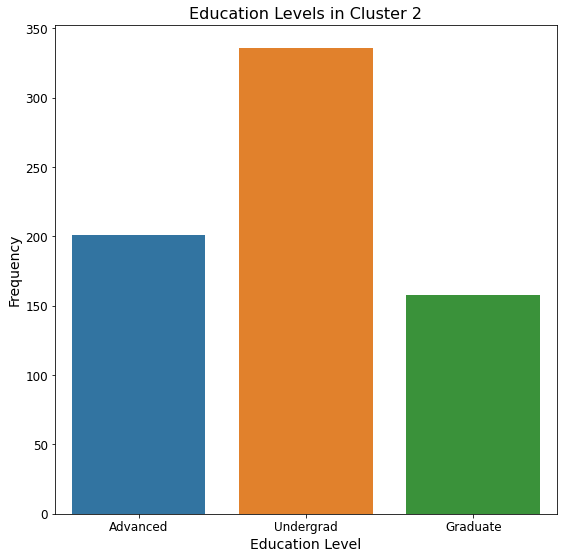

In [ ]:
# Plot education level representation in cluster 2
plt.figure(figsize = (9, 9))
sns.countplot(x = 'education', data = bank_final.loc[bank_final['kproto_label'] == 2])
plt.title('Education Levels in Cluster 2', size = 16)
plt.xlabel('Education Level', size = 14)
plt.ylabel('Frequency', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

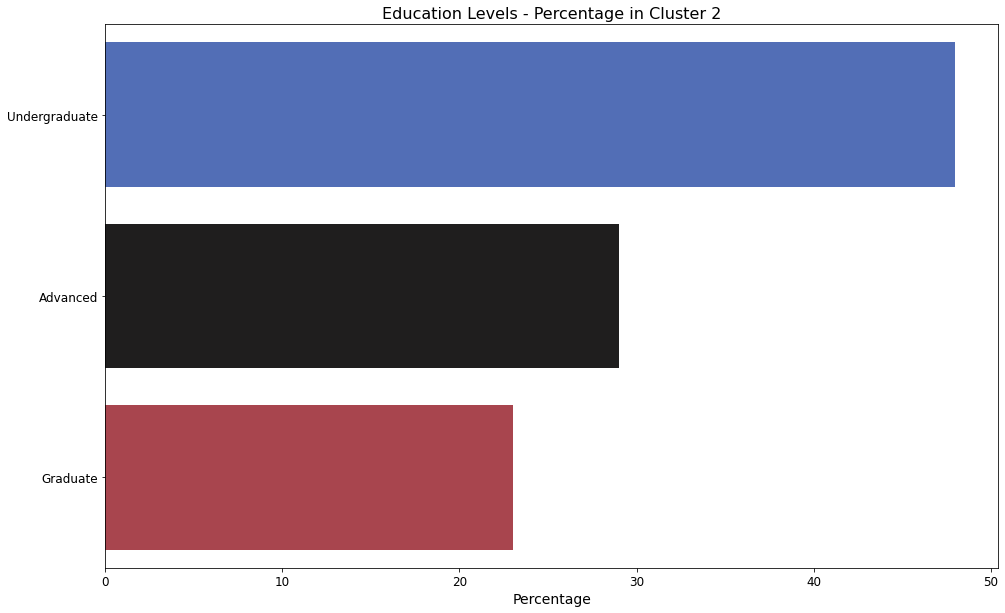

In [ ]:
# Percentages of education level
perc_under = round(bank_final.loc[bank_final['kproto_label'] == 2]['education'].value_counts()[0]/len( bank_final.loc[bank_final['kproto_label'] == 2]) * 100,)
perc_adv = round(bank_final.loc[bank_final['kproto_label'] == 2]['education'].value_counts()[1]/len( bank_final.loc[bank_final['kproto_label'] == 2]) * 100,)
perc_grad = round(bank_final.loc[bank_final['kproto_label'] == 2]['education'].value_counts()[2]/len( bank_final.loc[bank_final['kproto_label'] == 2]) * 100,)

# Plot
educ_perc = [perc_under, perc_adv, perc_grad]
edu_label = ['Undergraduate', 'Advanced', 'Graduate']

plt.figure(figsize = (16,10))
sns.barplot(y = edu_label, x = educ_perc, palette = 'icefire', orient = 'horizontal')
plt.title('Education Levels - Percentage in Cluster 2', size = 16)
plt.xlabel('Percentage', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

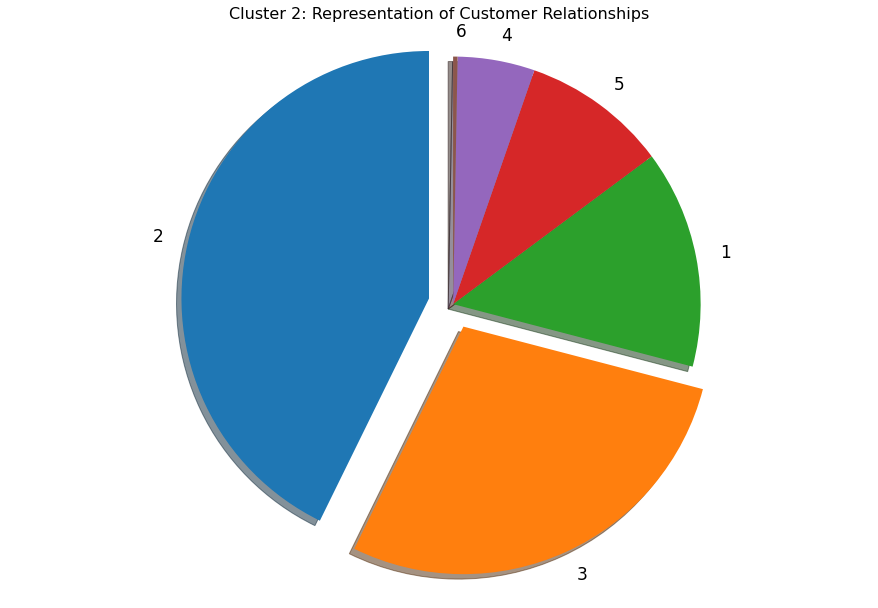

In [ ]:
# Get a count of each client in cluster two and how many products each has
labels = [2, 3, 1, 5, 4, 6]
explode = (0.1, 0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(x = bank_final.loc[bank_final['kproto_label'] == 2]['total_products'].value_counts(), labels=labels,
        shadow = True, startangle = 90, explode = explode, textprops = {'fontsize': 17})
plt.title('Cluster 2: Representation of Customer Relationships', size = 16)
ax1.axis('equal')
fig1.subplots_adjust(0, 0, 2, 2)
plt.show()

Majority of customers have 2 and 3 products within cluster two.
* 42.7% have 2 products
* 28.2% have 3 products

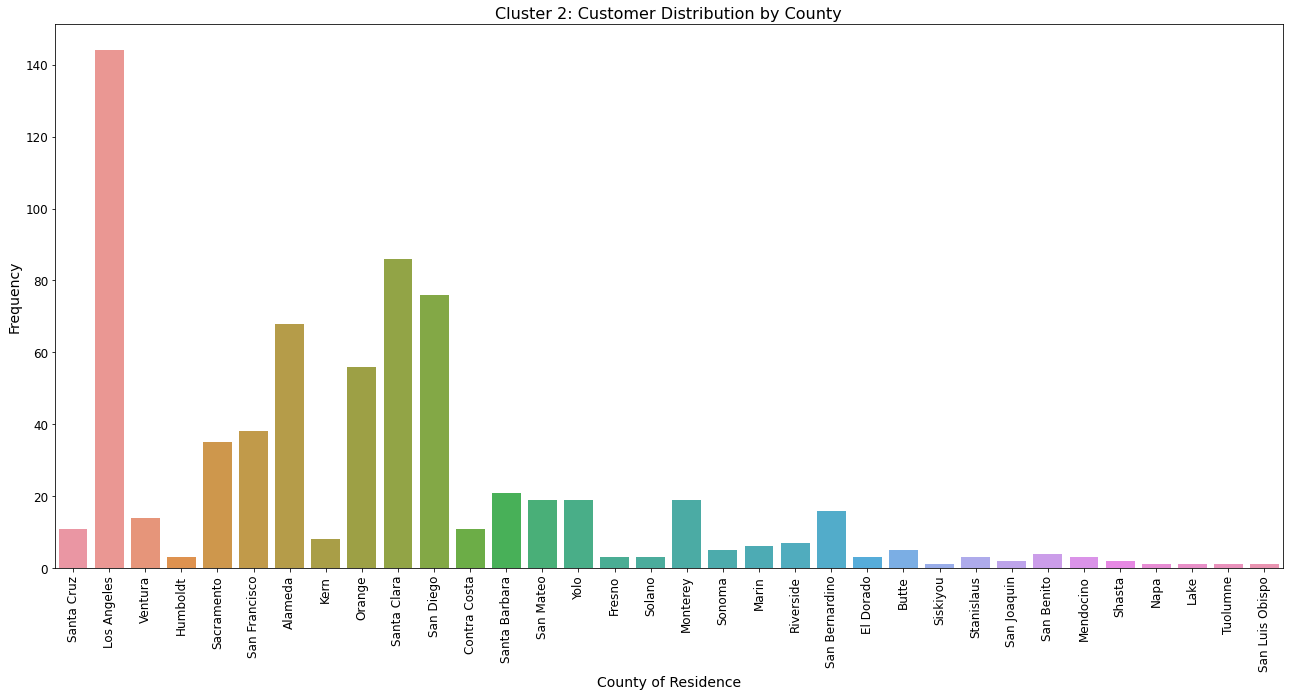

In [ ]:
# Where do cluster 2 people live?
plt.figure(figsize = (22, 10))
sns.countplot(x = 'county', data = bank_final.loc[bank_final['kproto_label'] == 2])
plt.title('Cluster 2: Customer Distribution by County', size = 16)
plt.xlabel('County of Residence', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(size = 12)
plt.xticks(rotation = 90, size = 12)
plt.show()

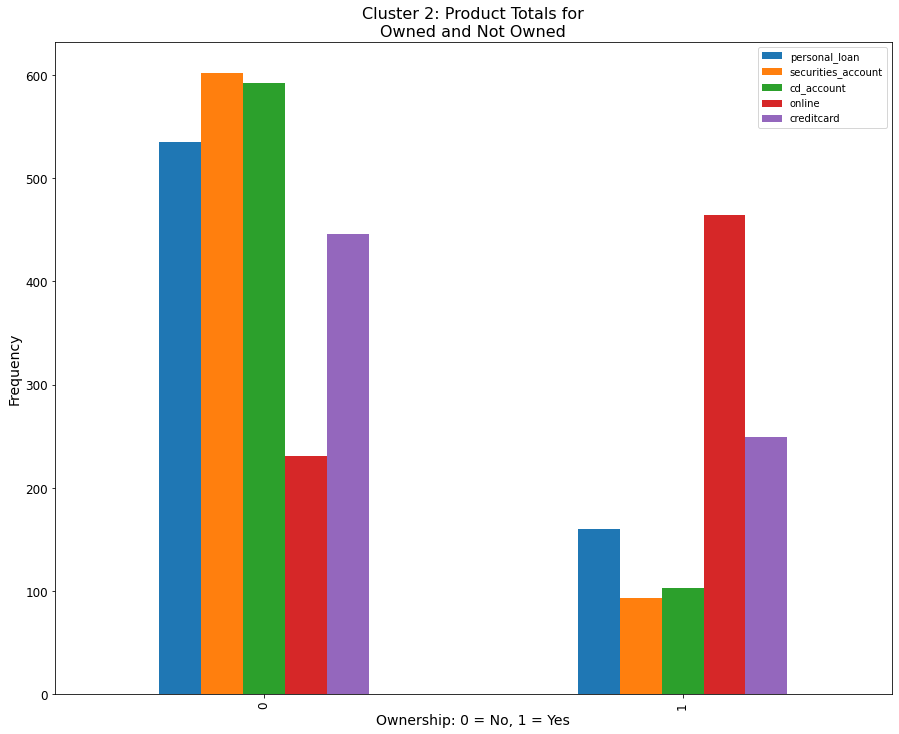

In [ ]:
# Most common product among cluster 2 customers
# which products are opportunities?
bank_final.loc[bank_final['kproto_label'] == 2][['personal_loan',	'securities_account',	'cd_account',	'online',	'creditcard']].apply(pd.Series.value_counts).plot(kind='bar', stacked=False, figsize=(15, 12))
plt.title('Cluster 2: Product Totals for\nOwned and Not Owned', size = 16)
plt.xlabel('Ownership: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.show()

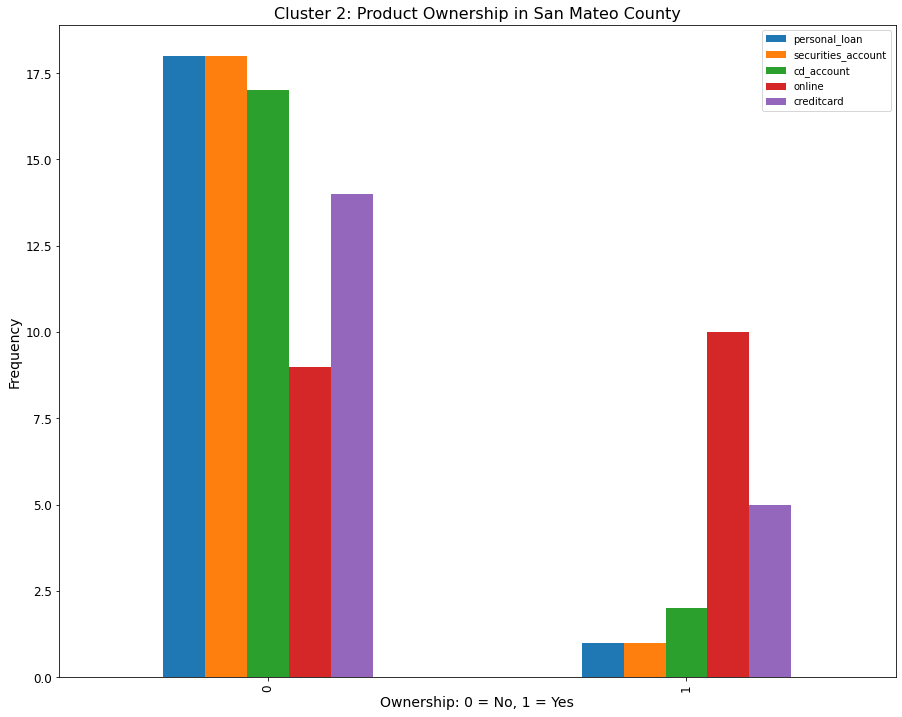

In [ ]:
# Zoom in to each county to identify product trends (San Mateo)
bank_final.loc[(bank_final['kproto_label'] == 2) & (bank_final['county'] == 'San Mateo')][['personal_loan',	'securities_account',	'cd_account',	'online',	'creditcard']].apply(pd.Series.value_counts).plot(kind='bar', stacked=False, figsize=(15, 12))
plt.title('Cluster 2: Product Ownership in San Mateo County', size = 16)
plt.xlabel('Ownership: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.show()

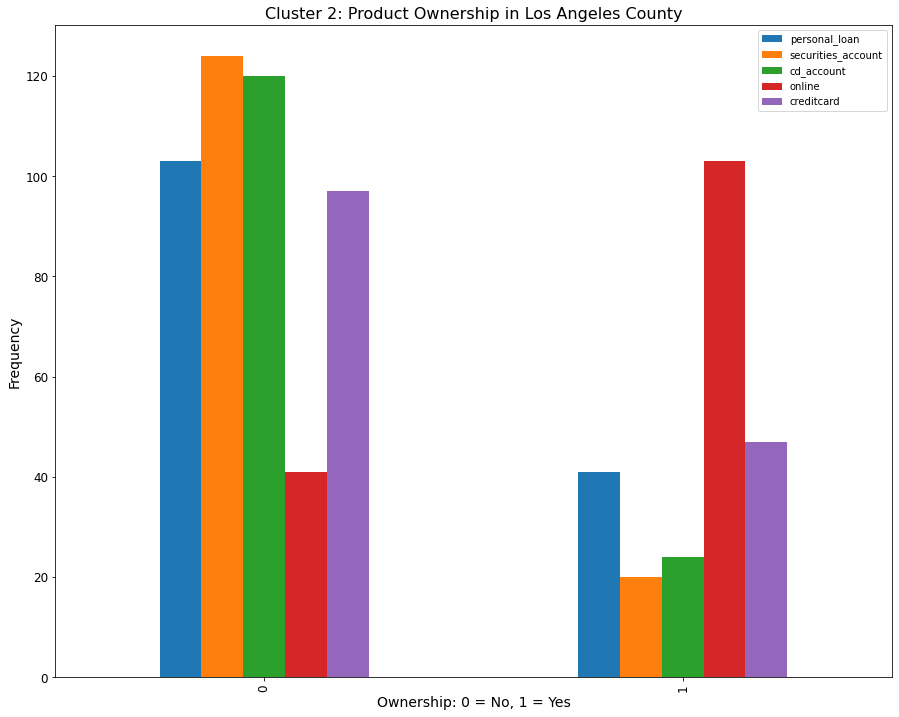

In [ ]:
# Zoom in to each county to identify product trends (Los Angeles)
bank_final.loc[(bank_final['kproto_label'] == 2) & (bank_final['county'] == 'Los Angeles')][['personal_loan',	'securities_account',	'cd_account',	'online',	'creditcard']].apply(pd.Series.value_counts).plot(kind='bar', stacked=False, figsize=(15, 12))
plt.title('Cluster 2: Product Ownership in Los Angeles County', size = 16)
plt.xlabel('Ownership: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.show()

Further analysis at county level can be beneficial for more targeted marketing campaigns

Improvement Opportunities

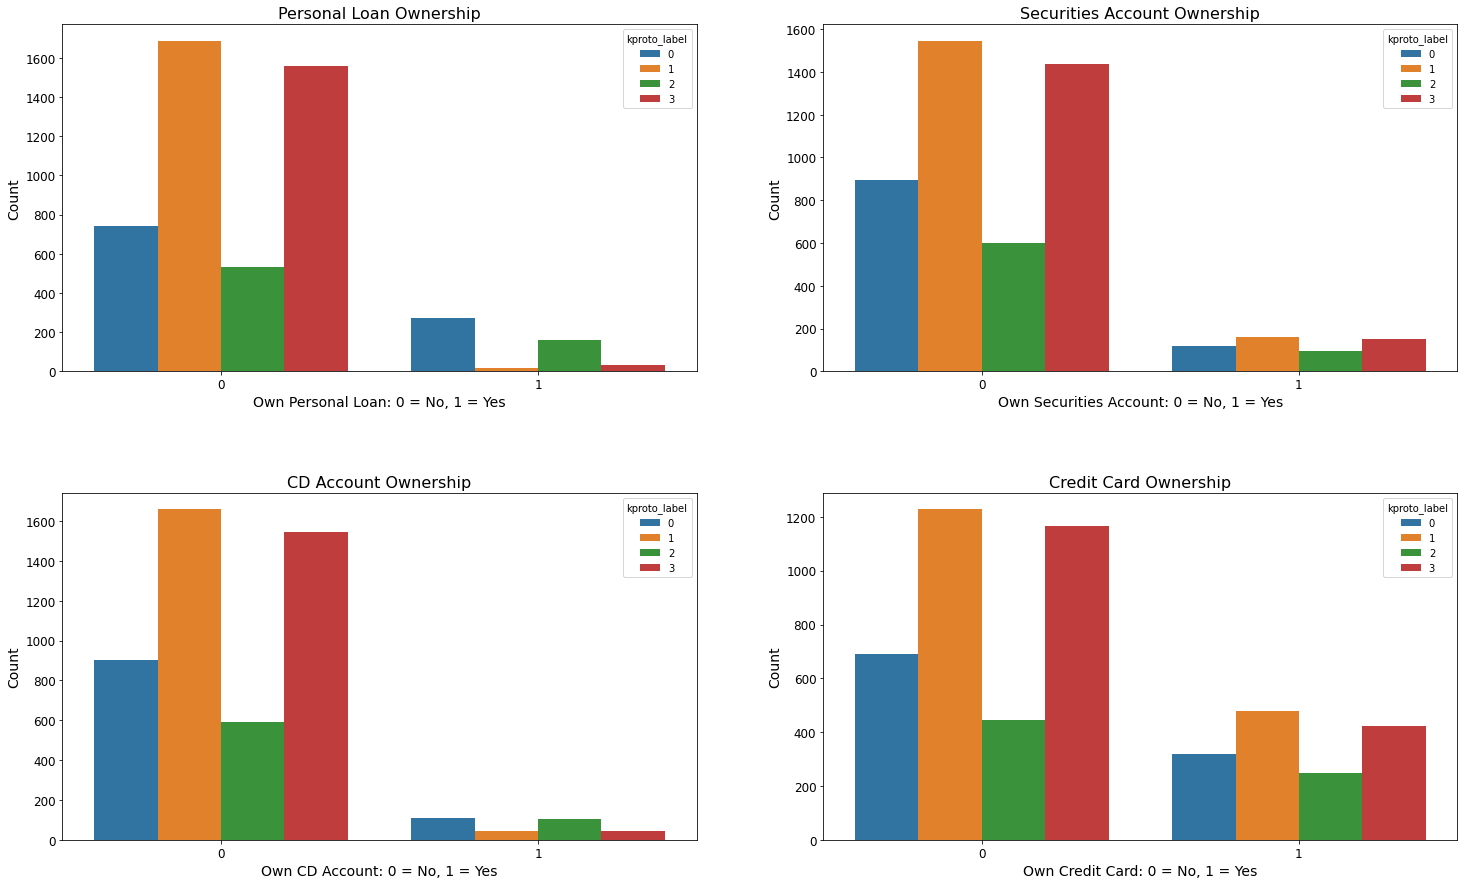

In [ ]:
# plot total product counts with cluster hue
plt.figure(figsize = (25, 15))
plt.subplot(2,2,1)
sns.countplot(x = 'personal_loan', hue = 'kproto_label', data = bank_final)
plt.title('Personal Loan Ownership', size = 16)
plt.xlabel('Own Personal Loan: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Count', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.subplot(2,2,2)
sns.countplot(x = 'securities_account', hue = 'kproto_label', data = bank_final)
plt.title('Securities Account Ownership', size = 16)
plt.xlabel('Own Securities Account: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Count', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.subplot(2,2,3)
sns.countplot(x = 'cd_account', hue = 'kproto_label', data = bank_final)
plt.title('CD Account Ownership', size = 16)
plt.xlabel('Own CD Account: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Count', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.subplot(2,2,4)
sns.countplot(x = 'creditcard', hue = 'kproto_label', data = bank_final)
plt.title('Credit Card Ownership', size = 16)
plt.xlabel('Own Credit Card: 0 = No, 1 = Yes', size = 14)
plt.ylabel('Count', size = 14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.subplots_adjust(hspace = 0.35)
plt.show()

Observations:

The cluster with lowest average total products owned by customers is number three. However, credit cards and securities accounts are among the most popular products in the cluster. 

Which cluster represents customers with the top average total products?
* Cluster 2 followed by cluster 0: Similarly to previous models, the clusters with optimal customer relationships also have the highest average incomes and credit card usage volumes.



**Results**

The four clusters resulting from the k-prototype model shows greater separation across various variables in the dataset. The distinction can be observed through descriptive statistics as well through visualization. The application of k-means to evaluate continuous variables and k-modes for evaluating categorical variables makes this the model of choice for this project.

The analysis identifies cluster two as the group of customers that on average holds the most products with the bank. On the other hand, cluster three has the greatest room for improvement.

Cluster two is comprised of customers ranging in ages between 37 through 54 years old and has an average age of 45. The education level and experience for the majority of cluster one customers consists of an undergraduate degree, and twenty years of professional experience. Clients in cluster one have an average income of 106k per year, but incomes cover an inter-quartile range of 72k through 139k. Average mortgage balances for cluster two customers are the highest in the cluster set. Average monthly spending on credit cards also ranks high, coming in second behind cluster zero.

A brief overview of cluster three provides an insight into the type of banking products that are more prevalent among the corresponding customers. A focus on continuing to promote more popular products within each cluster will enable the steady growth of customer relationships.

A marketing strategy for cluster two can be a more broadened approach. The focus should be placed on selling the benefits of having all your banking needs fulfilled in one place. Cluster three could gain from an approach that aims at selling popular products within the cluster to customers in the cluster who do not own the product. In the case of cluster three, a good start in developing relationships would be marketing securities and credit cards to clients without the products.

Future work with this dataset includes further analysis of the markets included in this dataset to design county specific marketing campaigns. The dataset can also benefit from a few additional features. For example, a “customer since” column is data that should be readily available and beneficial in determining retention trends. Employer information is feature that would be valuable in developing corporate partnership programs.
